In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [29]:
# Load data
filename = "data/rand_computation_times_vs_raw.csv"
data = pd.read_csv(filename)
save_dir = "plots/vs_raw"

os.makedirs(save_dir, exist_ok=True)

data.head()

Solver   N  density       time
0  Wrapped  10      0.1  12.861400
1  Wrapped  10      0.1   0.001574
2  Wrapped  10      0.1   0.001476
3  Wrapped  10      0.1   0.002868
4  Wrapped  10      0.1   0.007292

In [30]:
stats = data.groupby(['Solver', 'N', 'density'])['time'].agg(
    q1=lambda x: x.quantile(0.25),
    median='median',
    q3=lambda x: x.quantile(0.75)
).reset_index()

# Calculate error bars
stats['lower_error'] = stats['median'] - stats['q1']
stats['upper_error'] = stats['q3'] - stats['median']

stats

Solver     N  density         q1     median         q3  lower_error  \
0   Not-wrapped    10   0.0005   0.003189   0.004773   0.007319     0.001584   
1   Not-wrapped    10   0.0010   0.003192   0.004287   0.007439     0.001094   
2   Not-wrapped    10   0.0050   0.002784   0.004819   0.007056     0.002034   
3   Not-wrapped    10   0.0100   0.002813   0.004372   0.007044     0.001560   
4   Not-wrapped    10   0.0500   0.002977   0.004367   0.008312     0.001389   
..          ...   ...      ...        ...        ...        ...          ...   
67      Wrapped  5000   0.0010   2.191892   2.232610   2.290645     0.040718   
68      Wrapped  5000   0.0050  31.764550  32.270000  32.648950     0.505450   
69      Wrapped  5000   0.0100  23.953675  24.419000  24.986825     0.465325   
70      Wrapped  5000   0.0500  32.770075  33.357100  34.162450     0.587025   
71      Wrapped  5000   0.1000  36.114650  36.819850  37.504925     0.705200   

    upper_error  
0      0.002546  
1      0.003153  
2      0.002237  
3      0.002672  
4      0.003945  
..          ...  
67     0.058035  
68     0.378950  
69     0.567825  
70     0.805350  
71     0.685075  

[72 rows x 8 columns]

# Plots

Saved plot for N=10 at plots/vs_raw/N_10.png


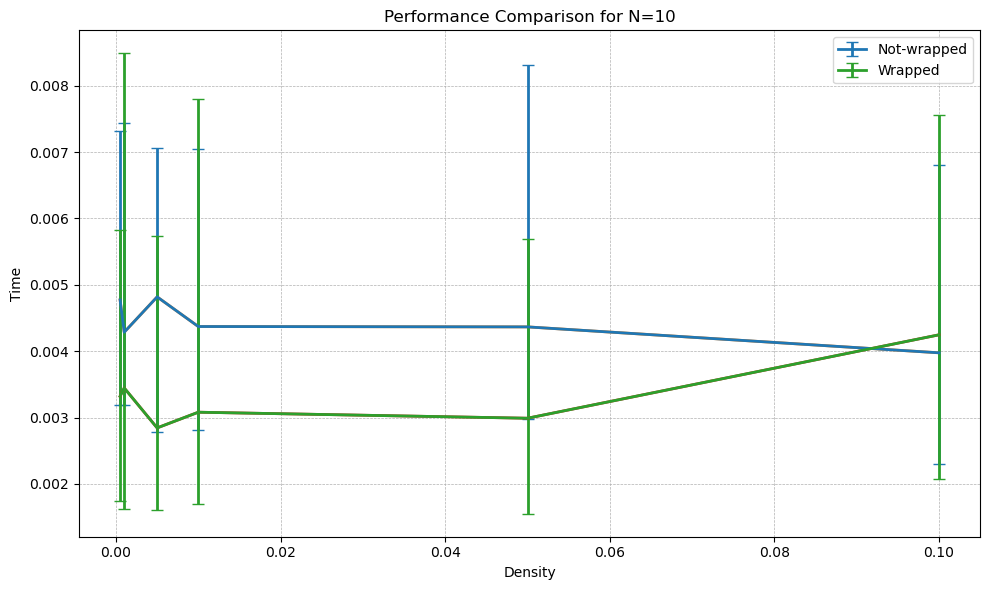

Saved plot for N=50 at plots/vs_raw/N_50.png


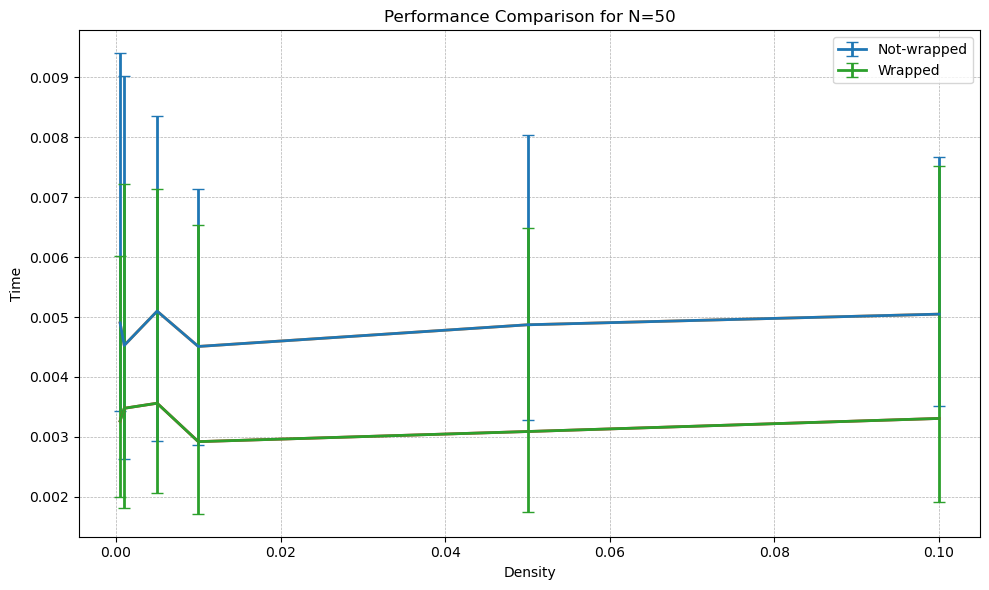

Saved plot for N=100 at plots/vs_raw/N_100.png


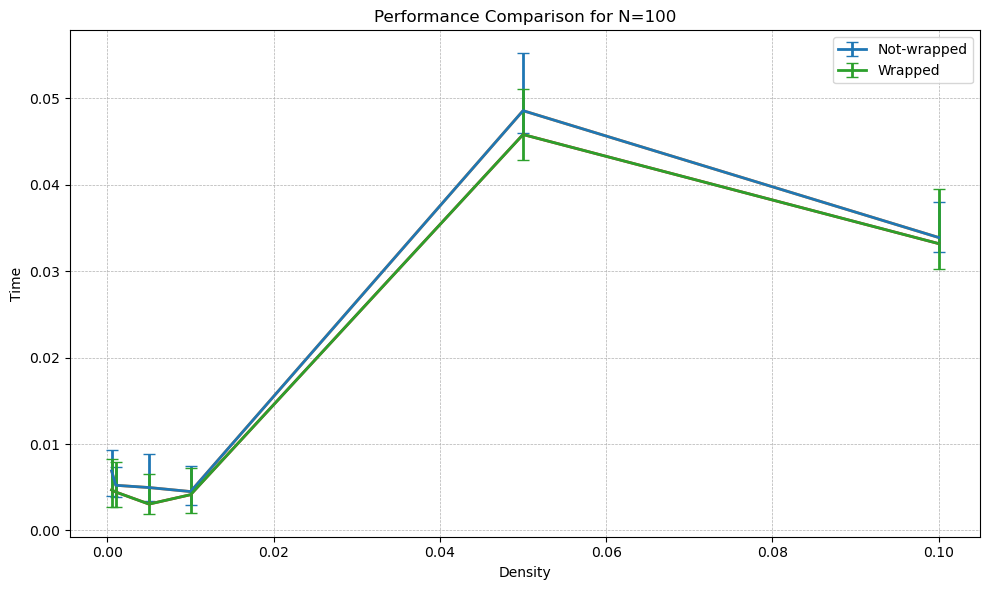

Saved plot for N=500 at plots/vs_raw/N_500.png


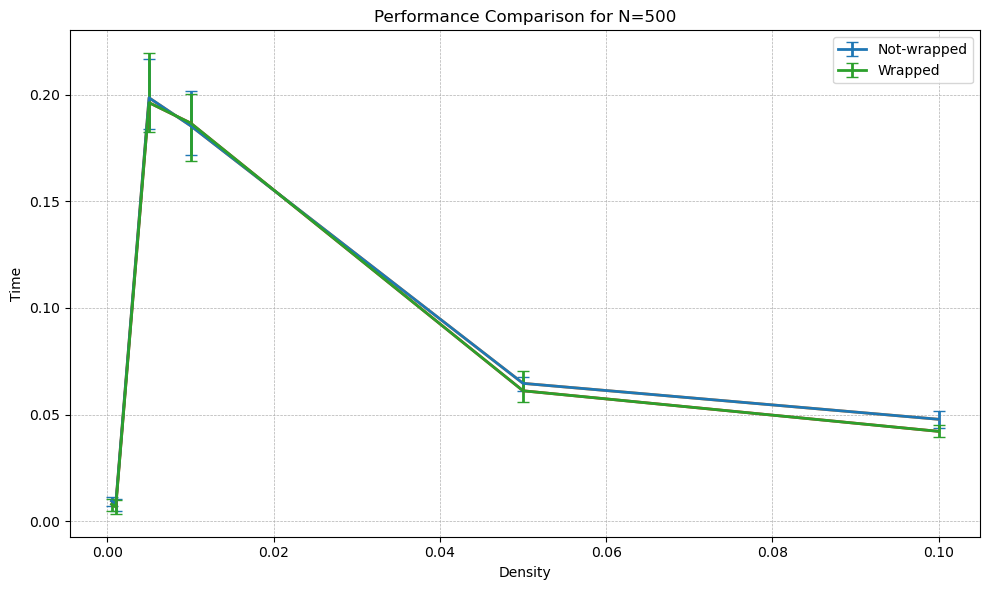

Saved plot for N=1000 at plots/vs_raw/N_1000.png


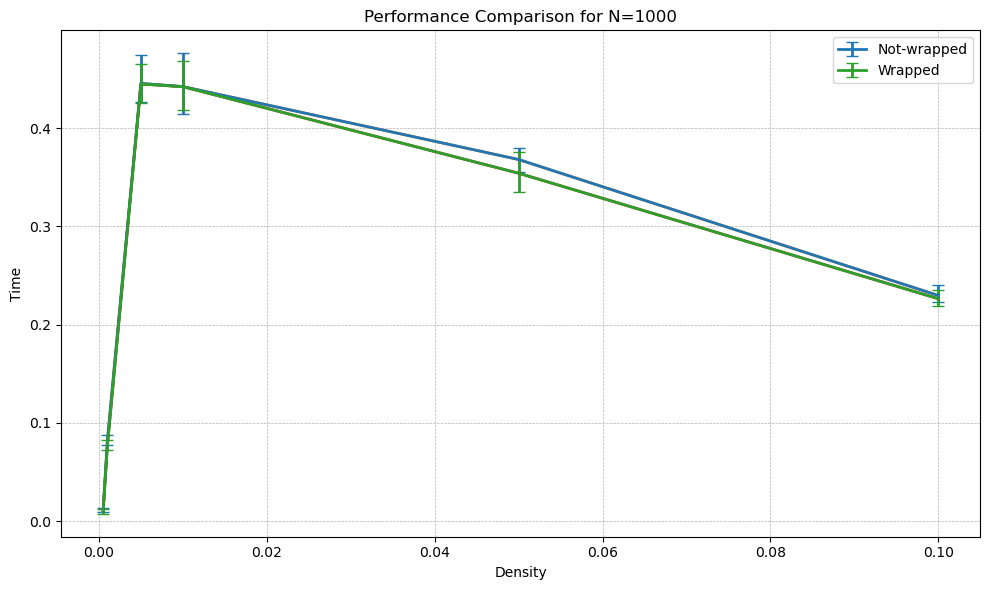

Saved plot for N=5000 at plots/vs_raw/N_5000.png


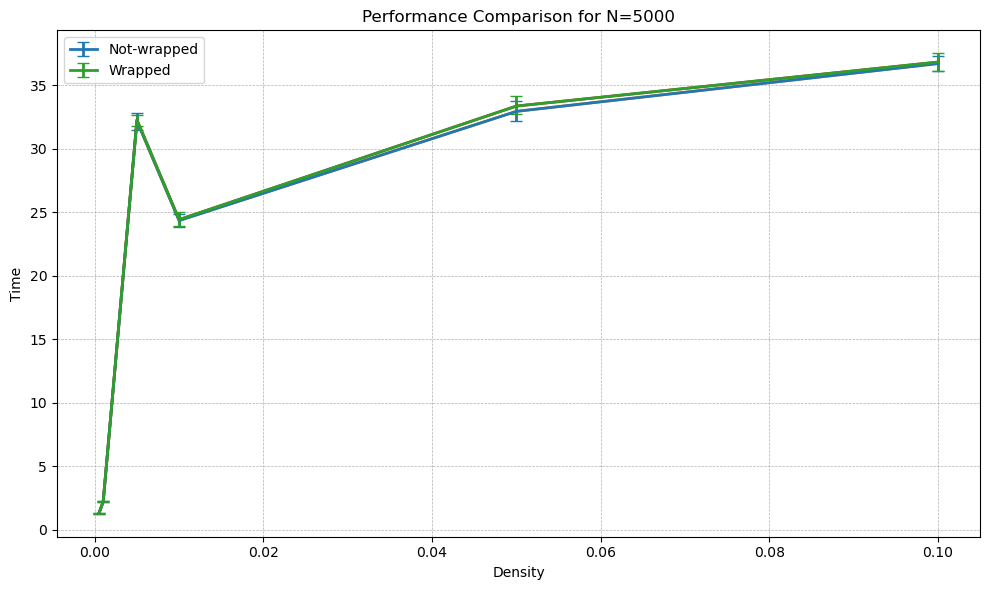

In [31]:
unique_N = stats['N'].unique()
for N in unique_N:
    subset = stats[stats['N'] == N]
    plt.figure(figsize=(10, 6))

    for solver in subset['Solver'].unique():
        solver_data = subset[subset['Solver'] == solver]
        plt.errorbar(
            solver_data['density'], solver_data['median'], 
            yerr=[solver_data['lower_error'], solver_data['upper_error']], 
            label=solver, linewidth=2, capsize=4
        )
        plt.plot(
            solver_data['density'], solver_data['median'], 
            label="_nolegend_", linewidth=2
        )

    # plt.xscale('log')
    # plt.yscale('log')
    plt.xlabel('Density')
    plt.ylabel('Time')
    plt.title(f'Performance Comparison for N={N}')
    plt.legend()
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.tight_layout()

    filename = os.path.join(save_dir, f"N_{N}.png")
    plt.savefig(filename)
    print(f"Saved plot for N={N} at {filename}")
    
    plt.show()

Saved plot for Density=0.0005 at plots/vs_raw/density_0.0005.png


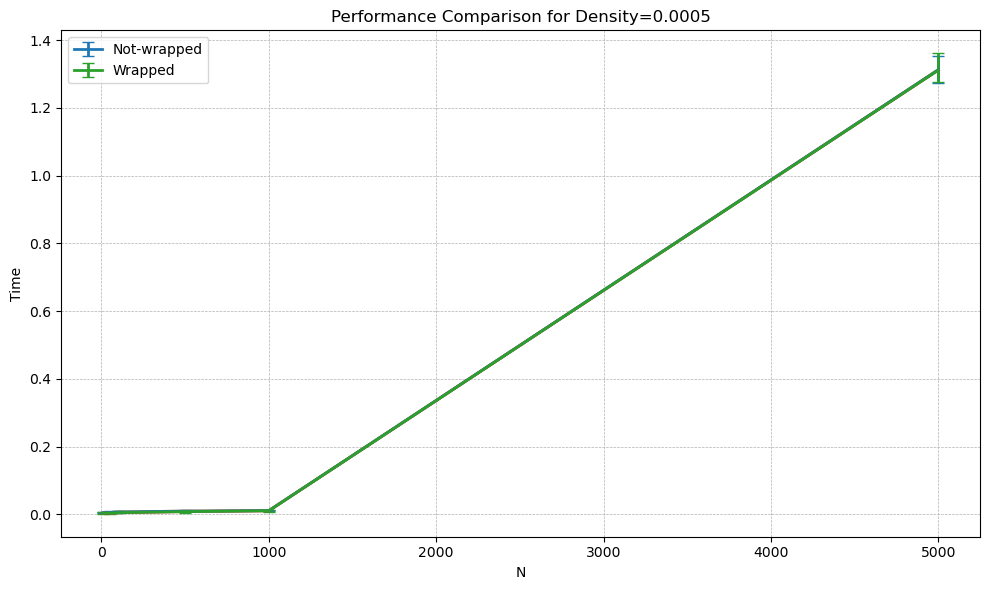

Saved plot for Density=0.001 at plots/vs_raw/density_0.001.png


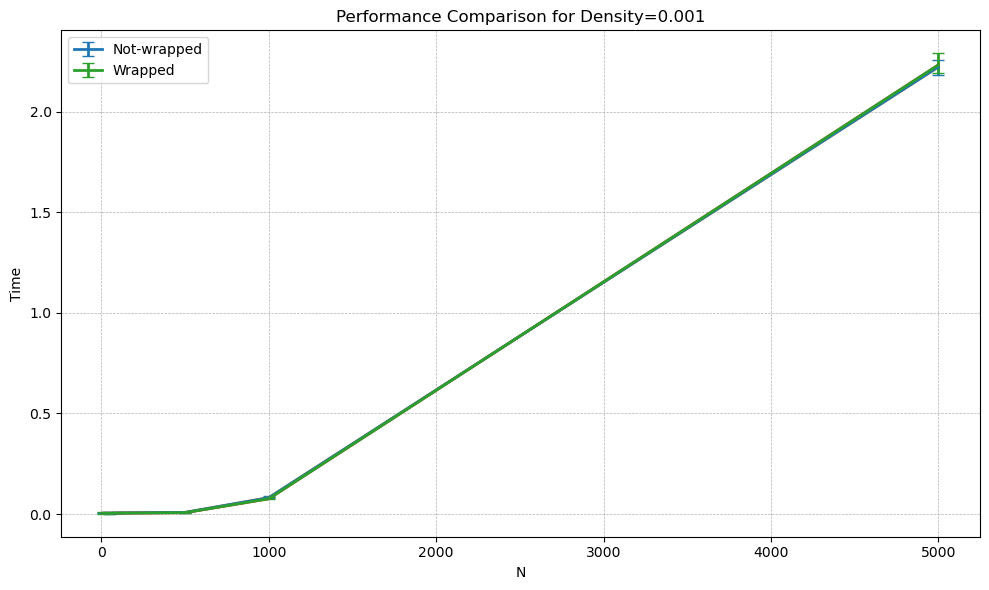

Saved plot for Density=0.005 at plots/vs_raw/density_0.005.png


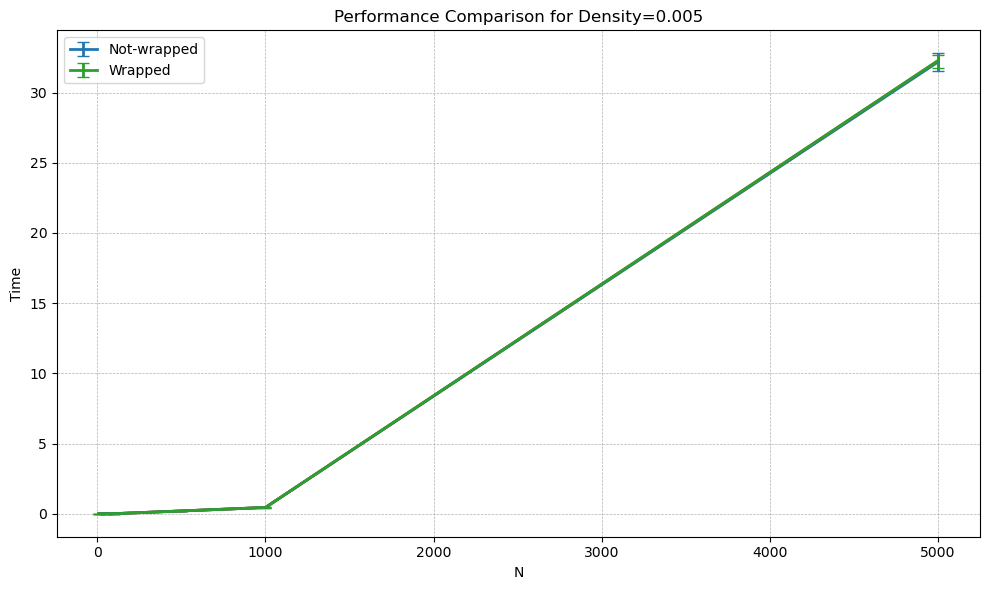

Saved plot for Density=0.01 at plots/vs_raw/density_0.01.png


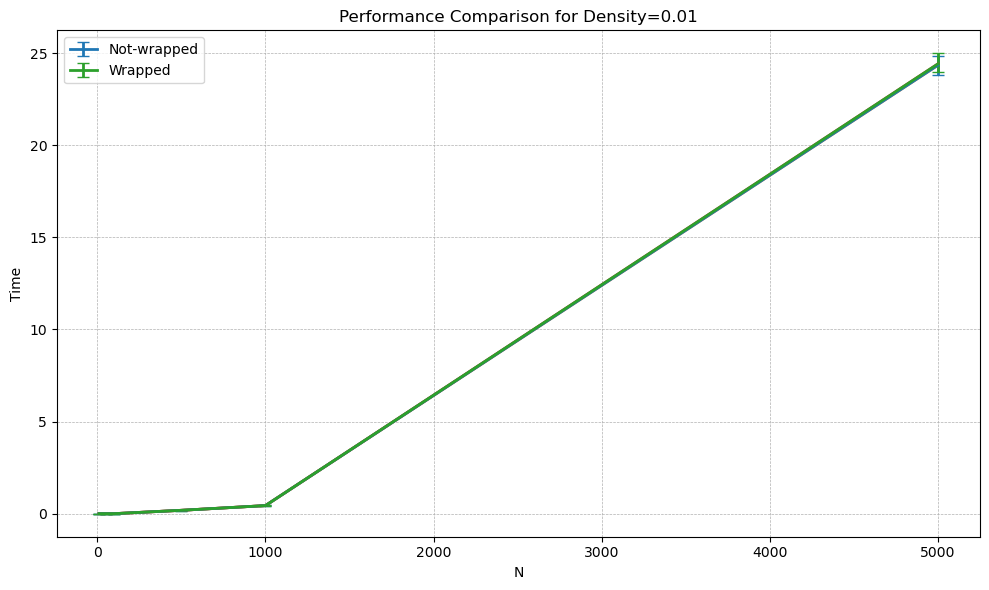

Saved plot for Density=0.05 at plots/vs_raw/density_0.05.png


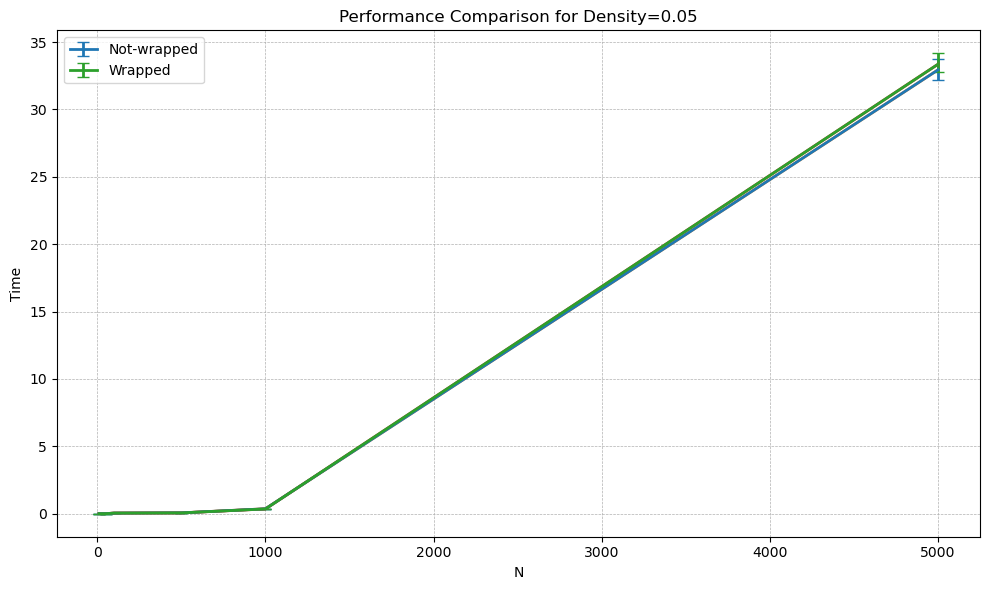

Saved plot for Density=0.1 at plots/vs_raw/density_0.1.png


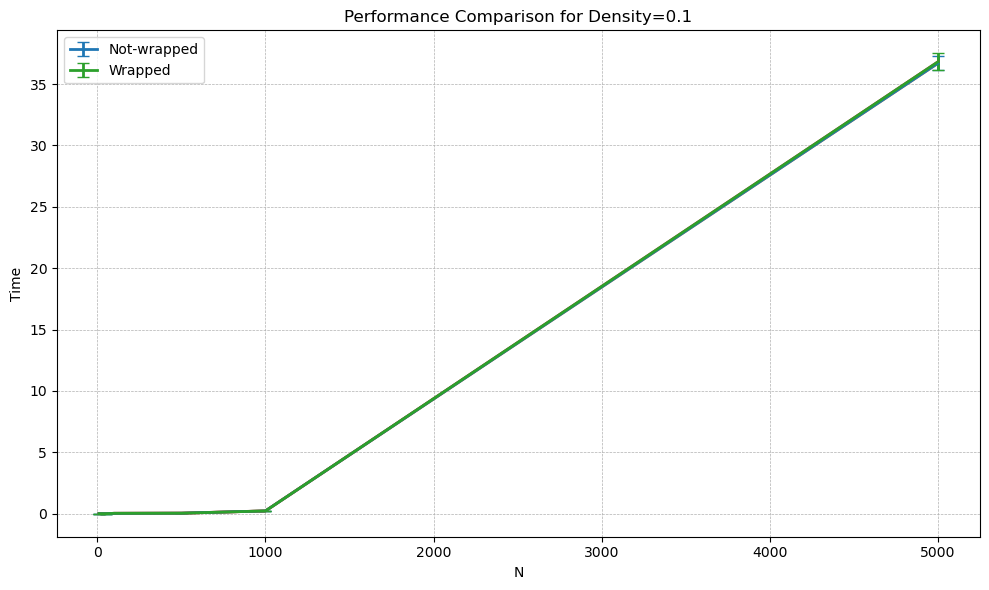

In [32]:
unique_density = stats['density'].unique()
for density in unique_density:
    subset = stats[stats['density'] == density]
    plt.figure(figsize=(10, 6))

    for solver in subset['Solver'].unique():
        solver_data = subset[subset['Solver'] == solver]
        plt.errorbar(
            solver_data['N'], solver_data['median'], 
            yerr=[solver_data['lower_error'], solver_data['upper_error']], 
            label=solver, linewidth=2, capsize=4
        )
        plt.plot(
            solver_data['N'], solver_data['median'], 
            label="_nolegend_", linewidth=2
        )

    # plt.xscale('log')
    # plt.yscale('log')
    plt.xlabel('N')
    plt.ylabel('Time')
    plt.title(f'Performance Comparison for Density={density}')
    plt.legend()
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.tight_layout()

    filename = os.path.join(save_dir, f"density_{density}.png")
    plt.savefig(filename)
    print(f"Saved plot for Density={density} at {filename}")
    
    plt.show()

# Loglog plots

In [33]:
loglog_dir = os.path.join(save_dir, "loglog")
os.makedirs(loglog_dir, exist_ok=True)

Saved plot for N=10 at plots/vs_raw/loglog/loglog_N_10.png


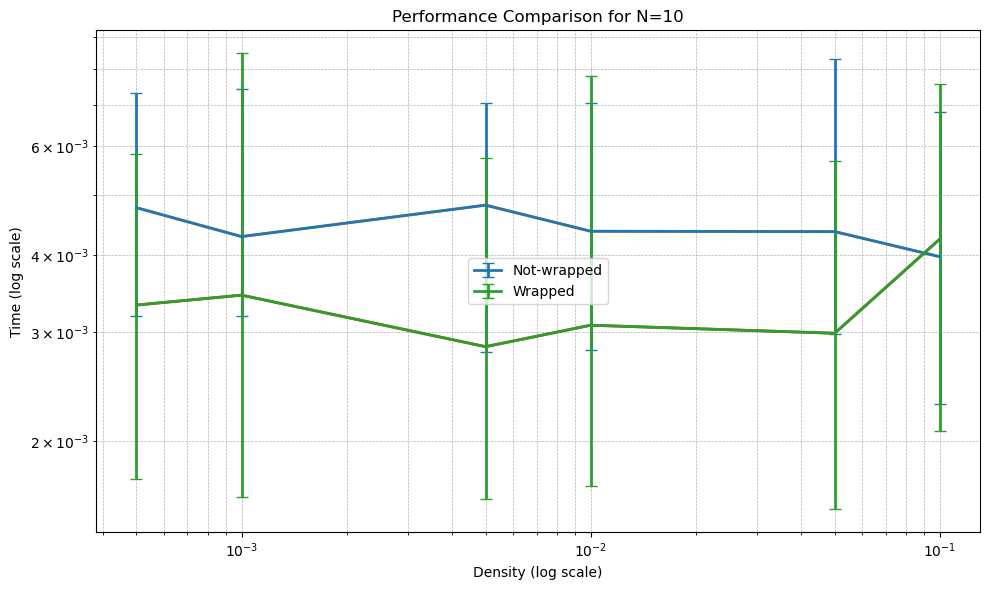

Saved plot for N=50 at plots/vs_raw/loglog/loglog_N_50.png


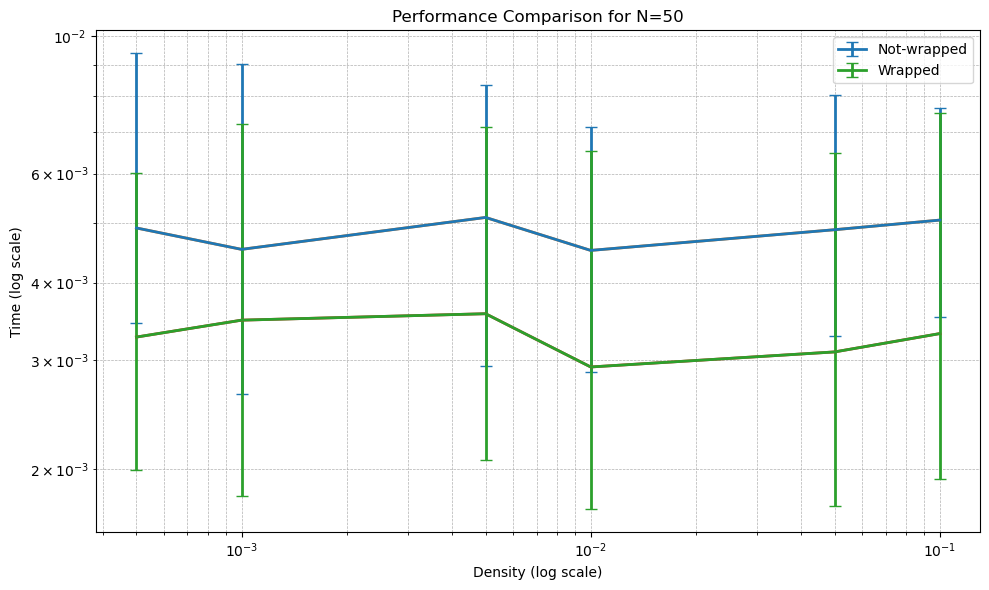

Saved plot for N=100 at plots/vs_raw/loglog/loglog_N_100.png


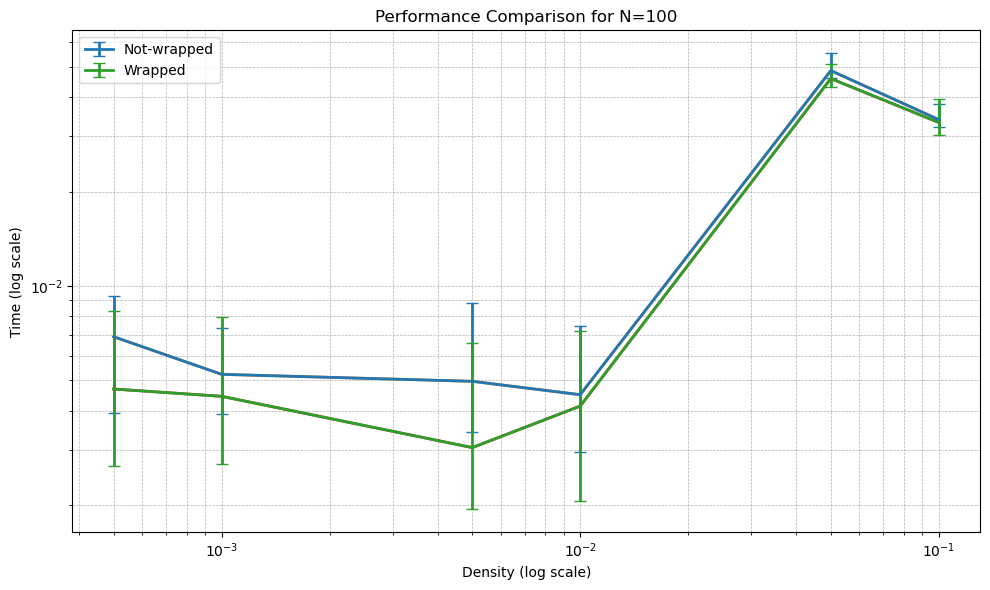

Saved plot for N=500 at plots/vs_raw/loglog/loglog_N_500.png


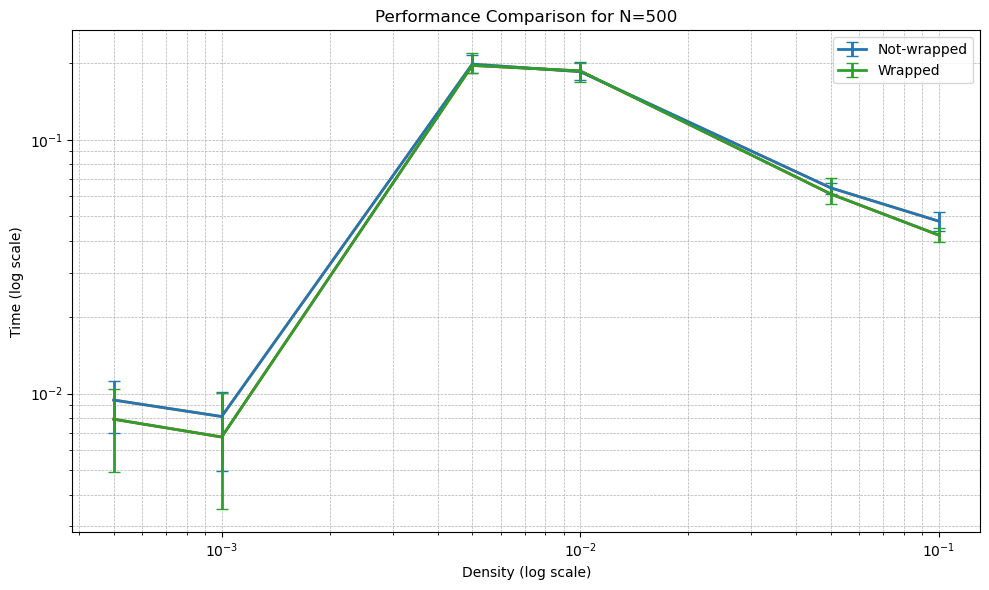

Saved plot for N=1000 at plots/vs_raw/loglog/loglog_N_1000.png


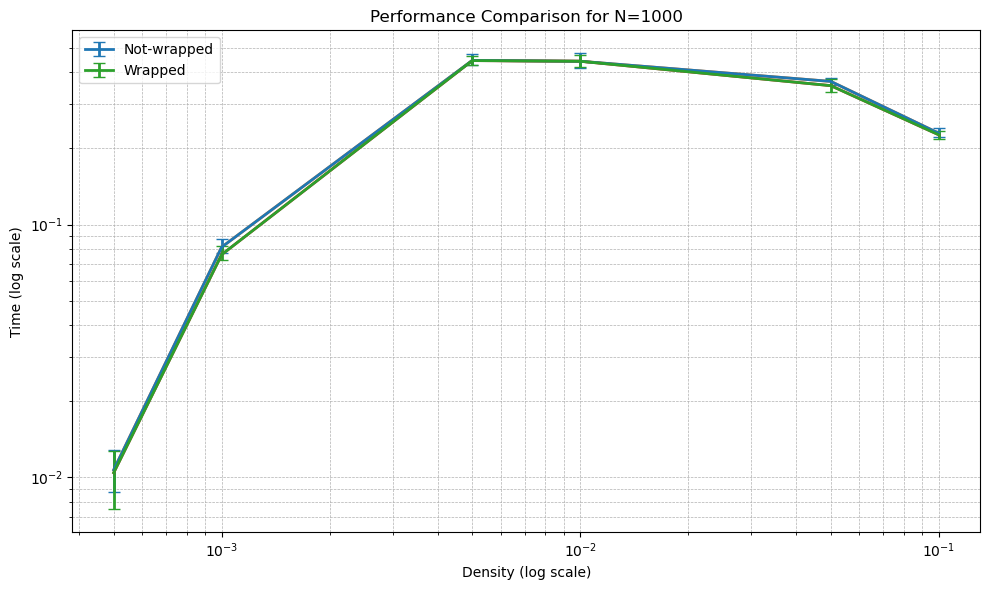

Saved plot for N=5000 at plots/vs_raw/loglog/loglog_N_5000.png


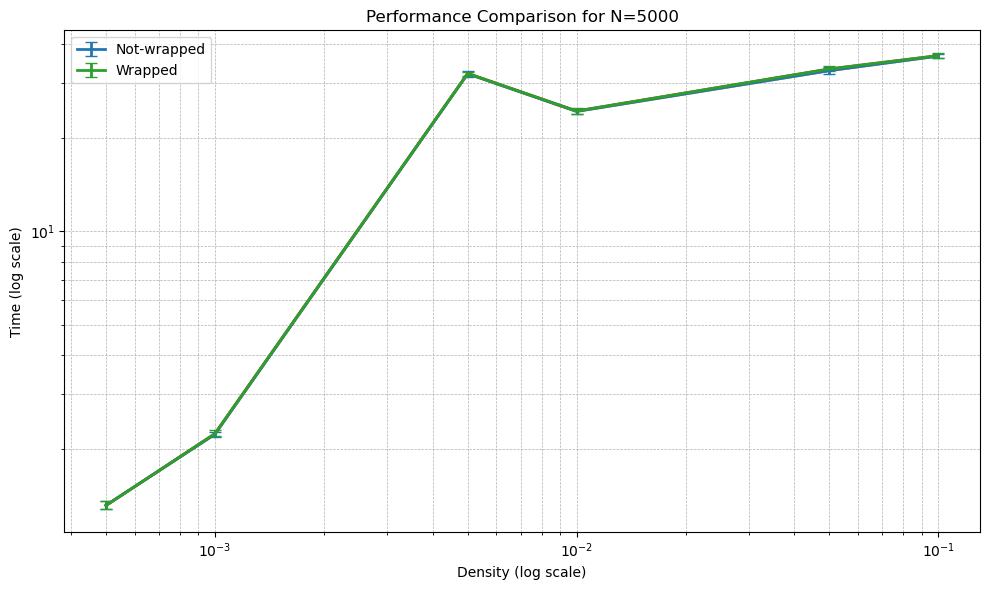

In [34]:
unique_N = stats['N'].unique()
for N in unique_N:
    subset = stats[stats['N'] == N]
    plt.figure(figsize=(10, 6))

    for solver in subset['Solver'].unique():
        solver_data = subset[subset['Solver'] == solver]
        plt.errorbar(
            solver_data['density'], solver_data['median'], 
            yerr=[solver_data['lower_error'], solver_data['upper_error']], 
            label=solver, linewidth=2, capsize=4
        )
        plt.plot(
            solver_data['density'], solver_data['median'], 
            label="_nolegend_", linewidth=2
        )

    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Density (log scale)')
    plt.ylabel('Time (log scale)')
    plt.title(f'Performance Comparison for N={N}')
    plt.legend()
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.tight_layout()

    filename = os.path.join(loglog_dir, f"loglog_N_{N}.png")
    plt.savefig(filename)
    print(f"Saved plot for N={N} at {filename}")
    
    plt.show()

Saved plot for Density=0.0005 at plots/vs_raw/loglog/loglog_density_0.0005.png


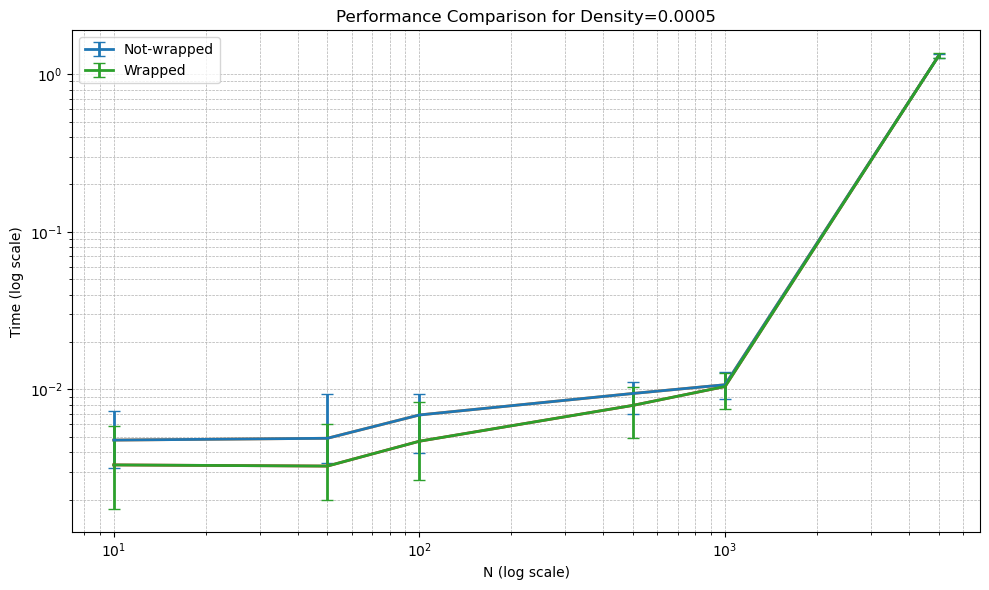

Saved plot for Density=0.001 at plots/vs_raw/loglog/loglog_density_0.001.png


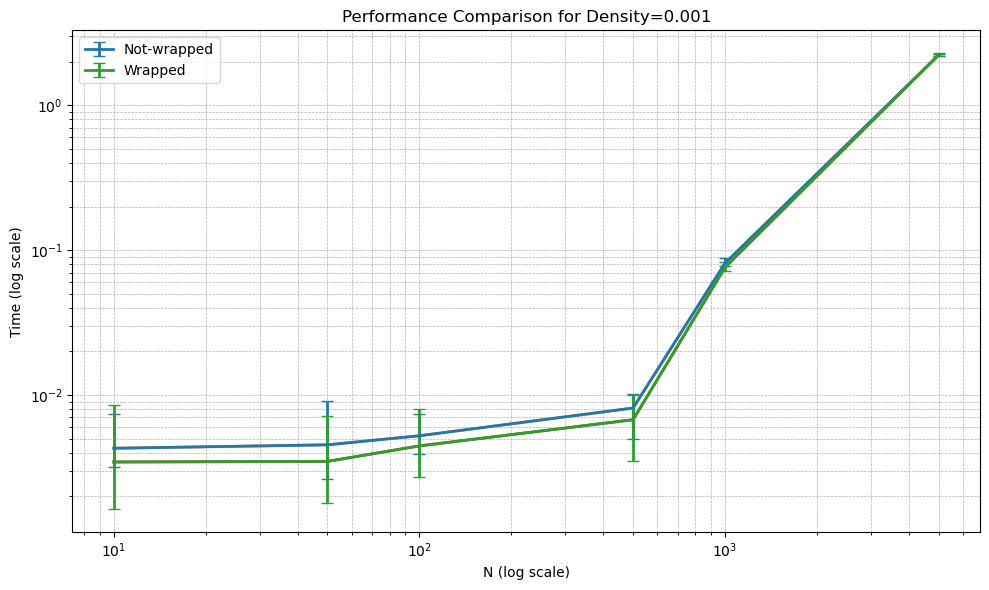

Saved plot for Density=0.005 at plots/vs_raw/loglog/loglog_density_0.005.png


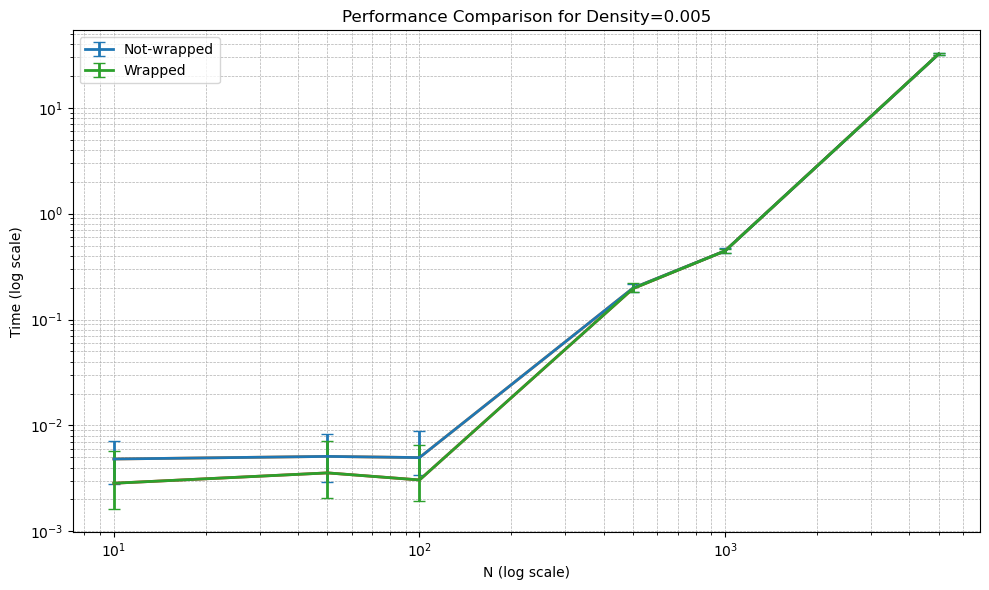

Saved plot for Density=0.01 at plots/vs_raw/loglog/loglog_density_0.01.png


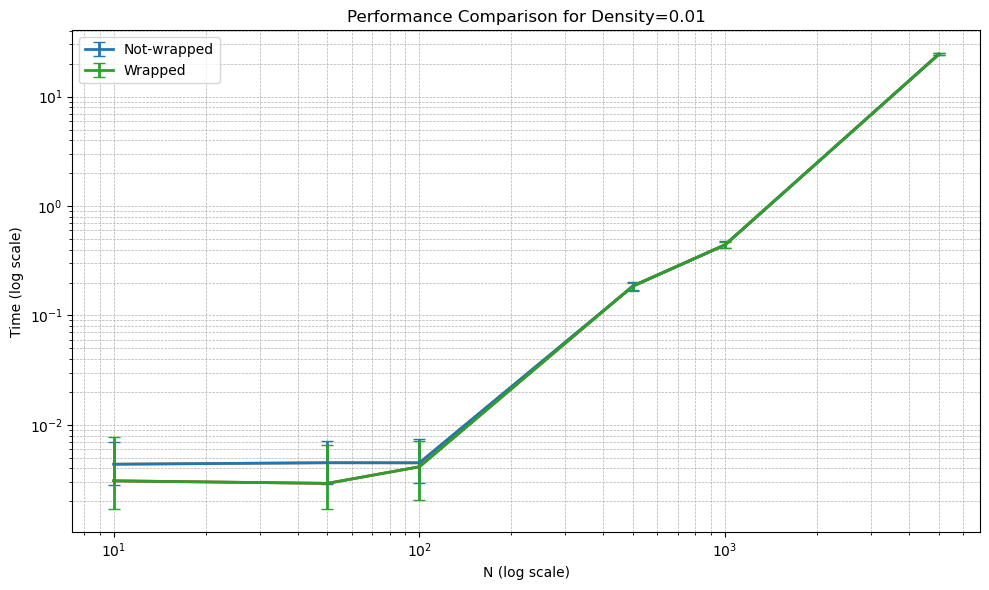

Saved plot for Density=0.05 at plots/vs_raw/loglog/loglog_density_0.05.png


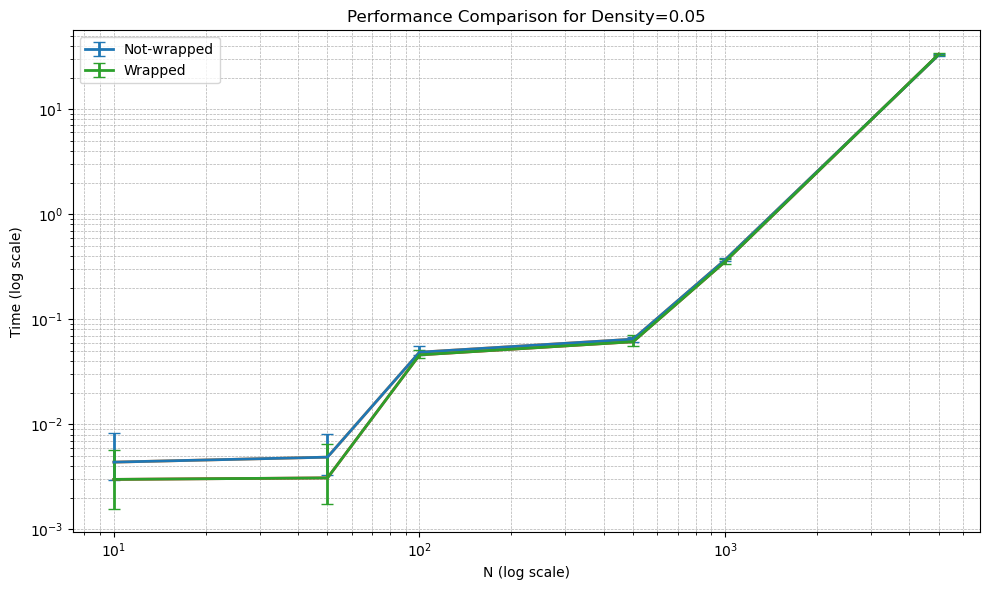

Saved plot for Density=0.1 at plots/vs_raw/loglog/loglog_density_0.1.png


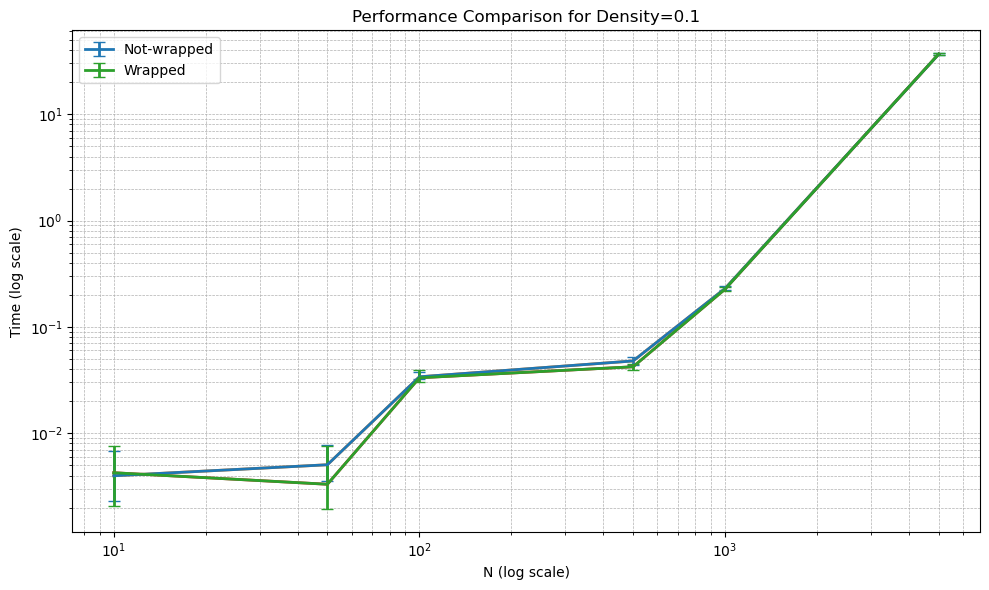

In [35]:
unique_density = stats['density'].unique()
for density in unique_density:
    subset = stats[stats['density'] == density]
    plt.figure(figsize=(10, 6))

    for solver in subset['Solver'].unique():
        solver_data = subset[subset['Solver'] == solver]
        plt.errorbar(
            solver_data['N'], solver_data['median'], 
            yerr=[solver_data['lower_error'], solver_data['upper_error']], 
            label=solver, linewidth=2, capsize=4
        )
        plt.plot(
            solver_data['N'], solver_data['median'], 
            label="_nolegend_", linewidth=2
        )

    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('N (log scale)')
    plt.ylabel('Time (log scale)')
    plt.title(f'Performance Comparison for Density={density}')
    plt.legend()
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.tight_layout()

    filename = os.path.join(loglog_dir, f"loglog_density_{density}.png")
    plt.savefig(filename)
    print(f"Saved plot for Density={density} at {filename}")
    
    plt.show()

# Logy plots

In [36]:
logy_dir = os.path.join(save_dir, "logy")
os.makedirs(logy_dir, exist_ok=True)

Saved plot for N=10 at plots/vs_raw/logy/logy_N_10.png


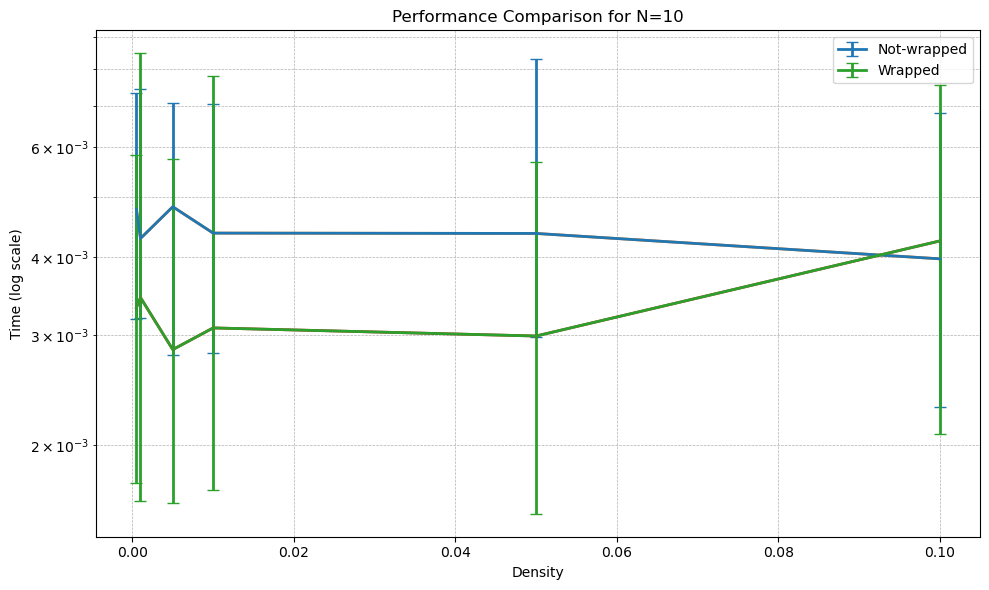

Saved plot for N=50 at plots/vs_raw/logy/logy_N_50.png


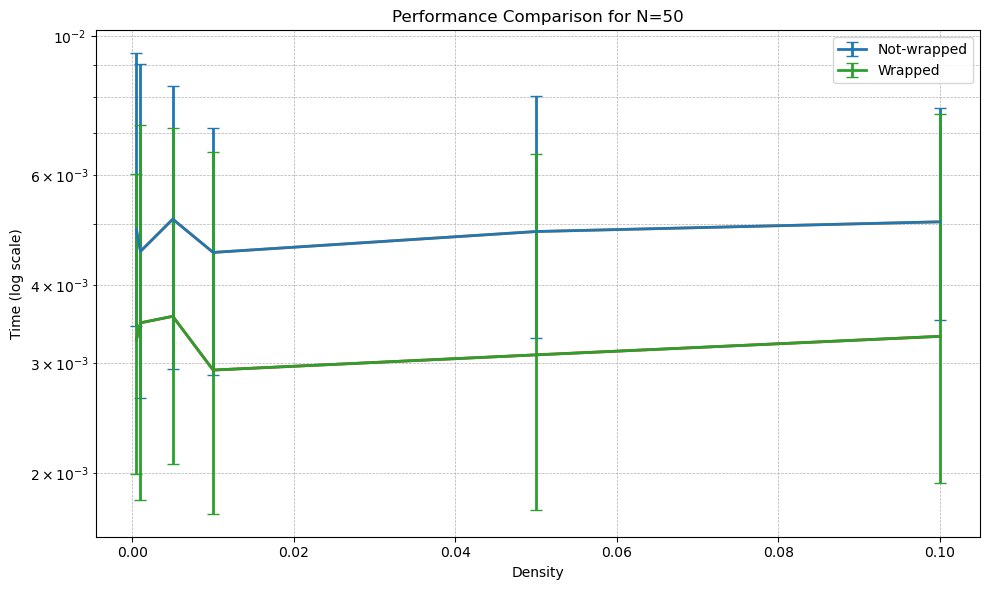

Saved plot for N=100 at plots/vs_raw/logy/logy_N_100.png


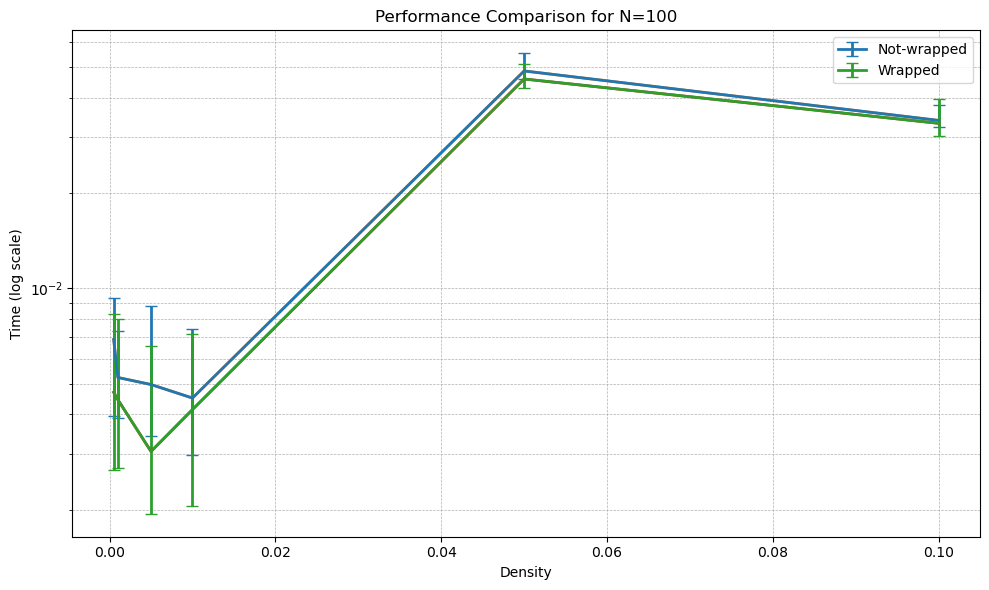

Saved plot for N=500 at plots/vs_raw/logy/logy_N_500.png


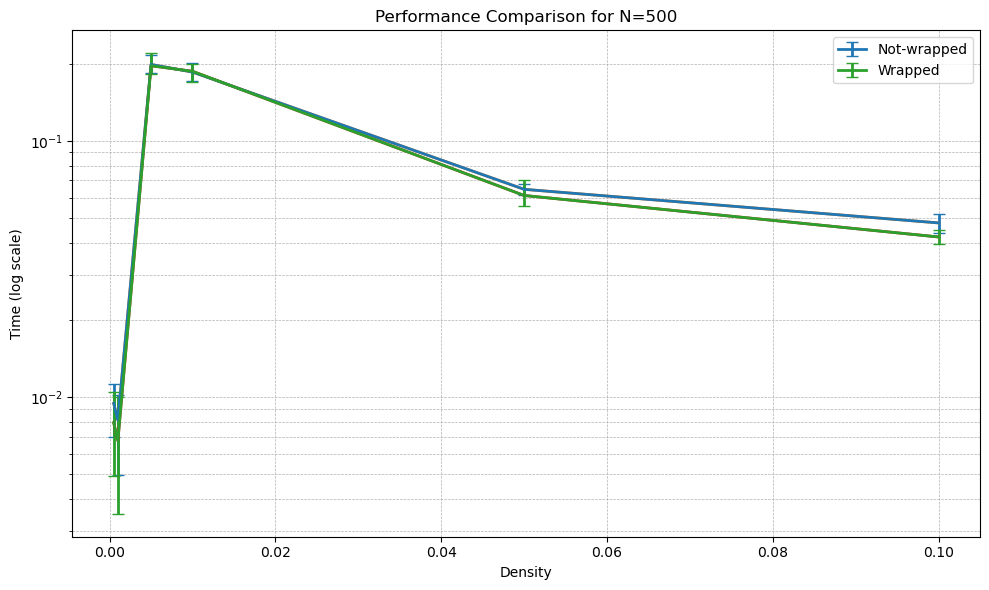

Saved plot for N=1000 at plots/vs_raw/logy/logy_N_1000.png


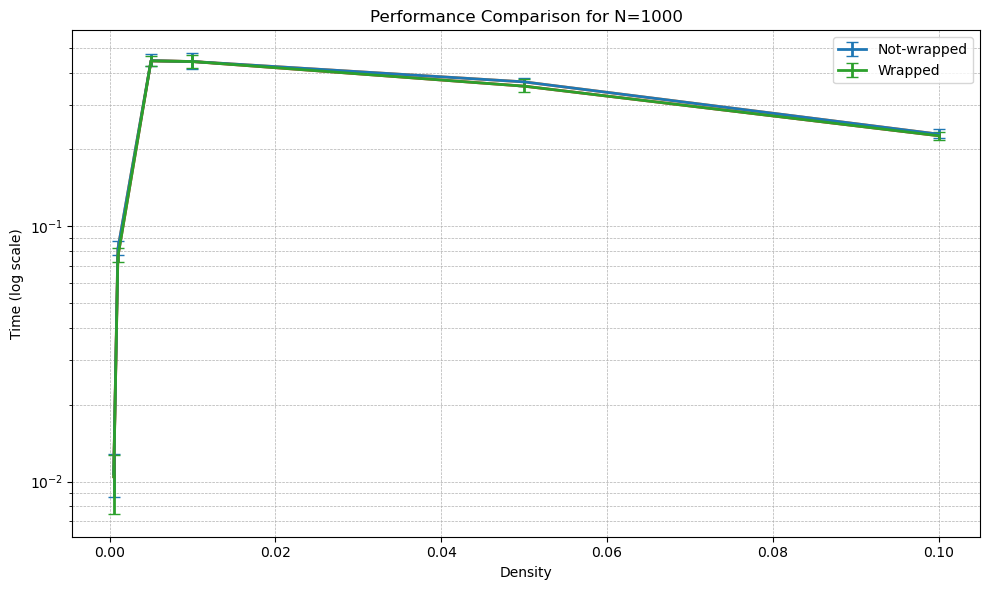

Saved plot for N=5000 at plots/vs_raw/logy/logy_N_5000.png


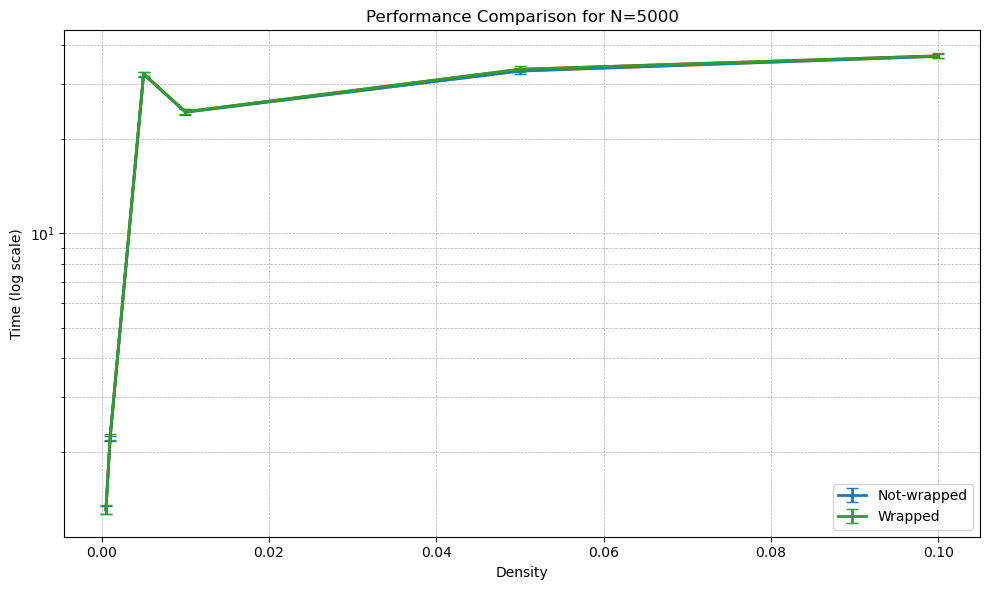

In [37]:
unique_N = stats['N'].unique()
for N in unique_N:
    subset = stats[stats['N'] == N]
    plt.figure(figsize=(10, 6))

    for solver in subset['Solver'].unique():
        solver_data = subset[subset['Solver'] == solver]
        plt.errorbar(
            solver_data['density'], solver_data['median'], 
            yerr=[solver_data['lower_error'], solver_data['upper_error']], 
            label=solver, linewidth=2, capsize=4
        )
        plt.plot(
            solver_data['density'], solver_data['median'], 
            label="_nolegend_", linewidth=2 
        )

    # plt.xscale('log')   
    plt.yscale('log')   
    plt.xlabel('Density')
    plt.ylabel('Time (log scale)')
    plt.title(f'Performance Comparison for N={N}')
    plt.legend()
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.tight_layout()

    filename = os.path.join(logy_dir, f"logy_N_{N}.png")
    plt.savefig(filename)
    print(f"Saved plot for N={N} at {filename}")
    
    plt.show()

Saved plot for Density=0.0005 at plots/vs_raw/logy/logy_density_0.0005.png


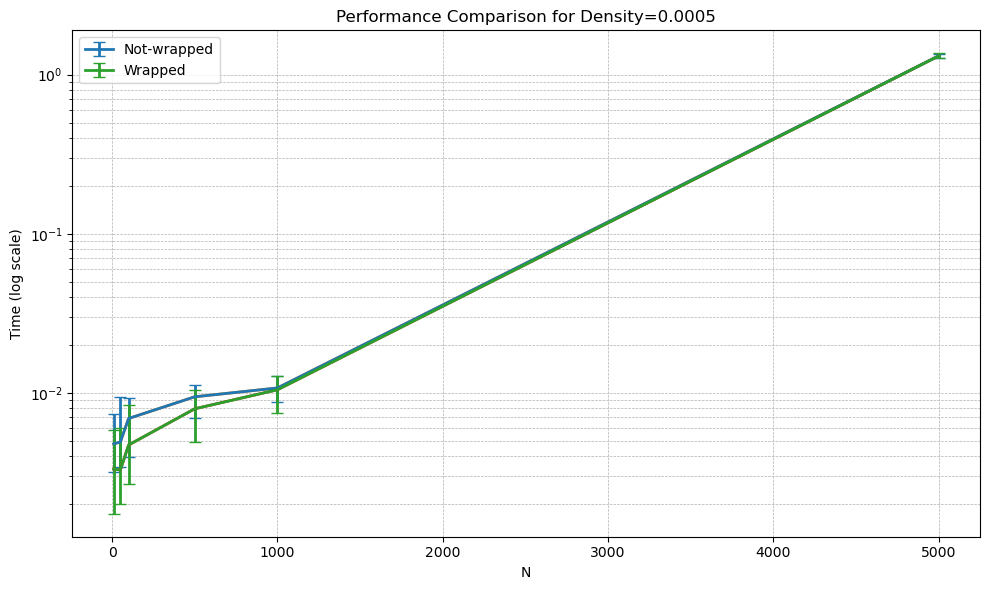

Saved plot for Density=0.001 at plots/vs_raw/logy/logy_density_0.001.png


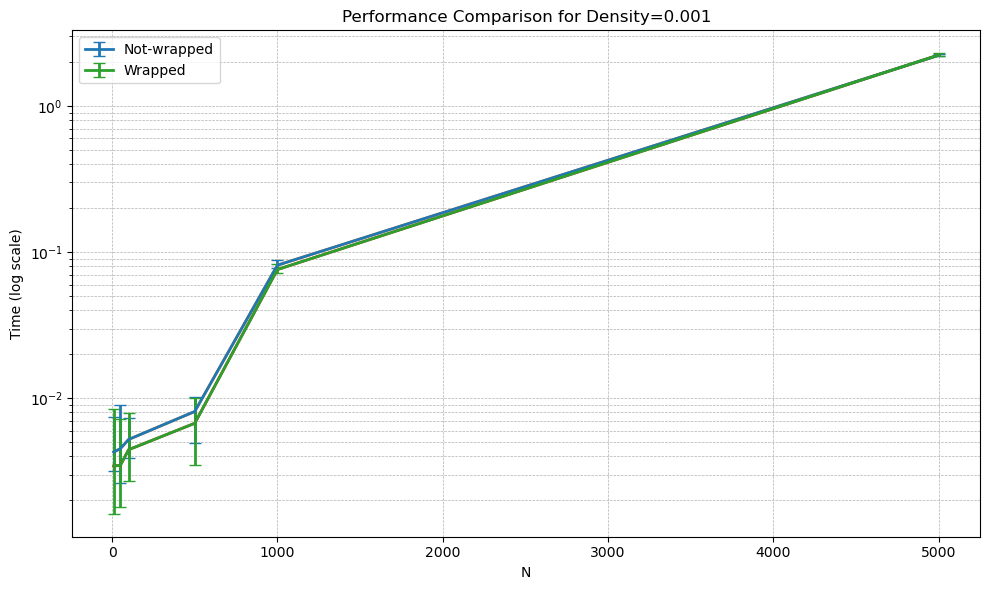

Saved plot for Density=0.005 at plots/vs_raw/logy/logy_density_0.005.png


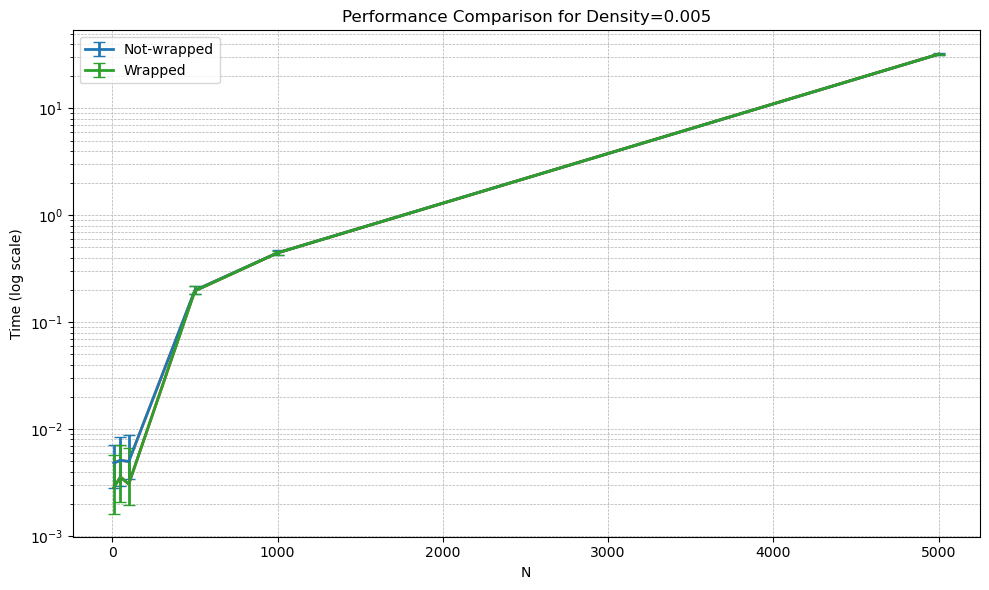

Saved plot for Density=0.01 at plots/vs_raw/logy/logy_density_0.01.png


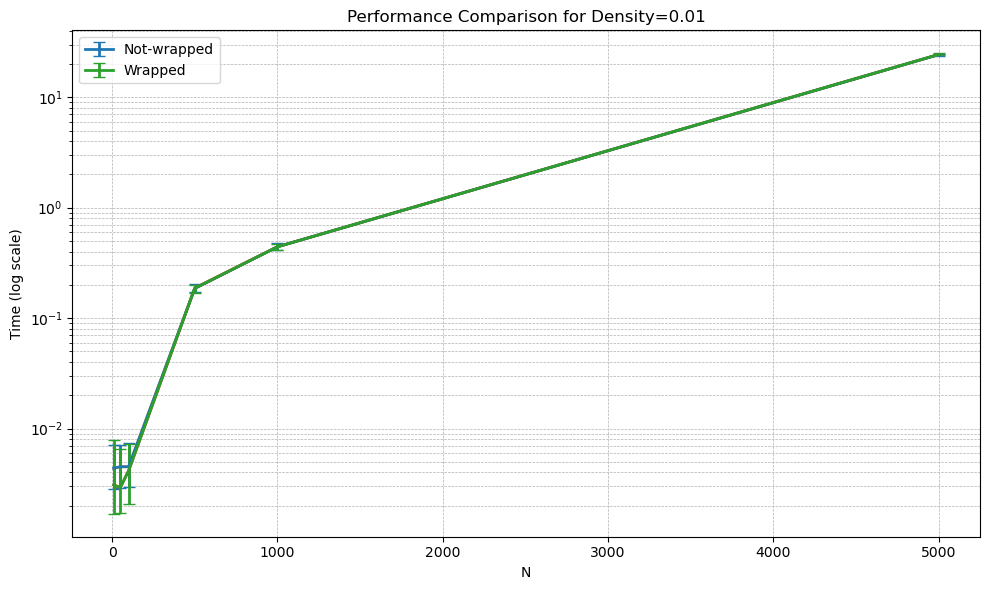

Saved plot for Density=0.05 at plots/vs_raw/logy/logy_density_0.05.png


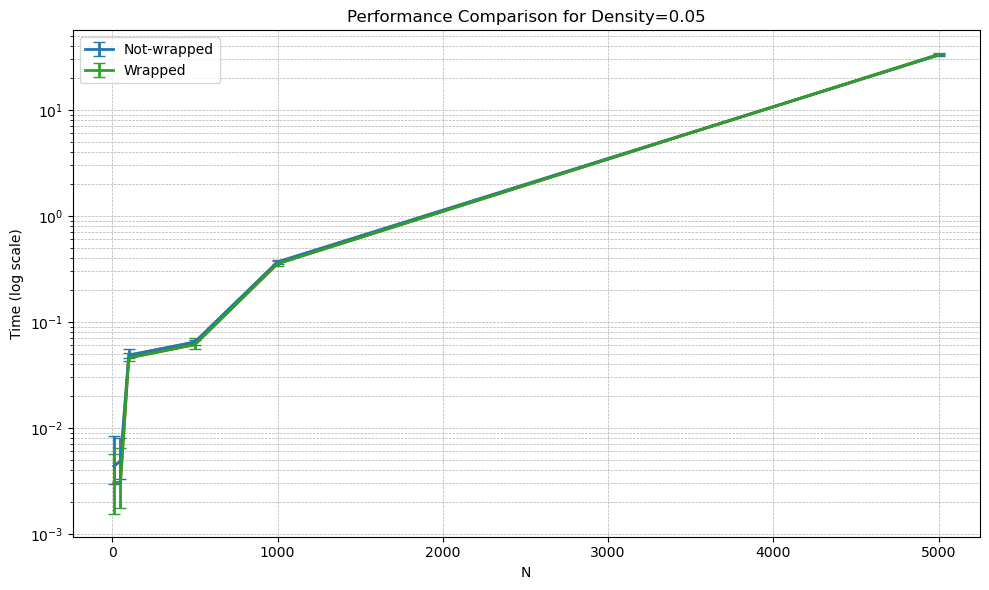

Saved plot for Density=0.1 at plots/vs_raw/logy/logy_density_0.1.png


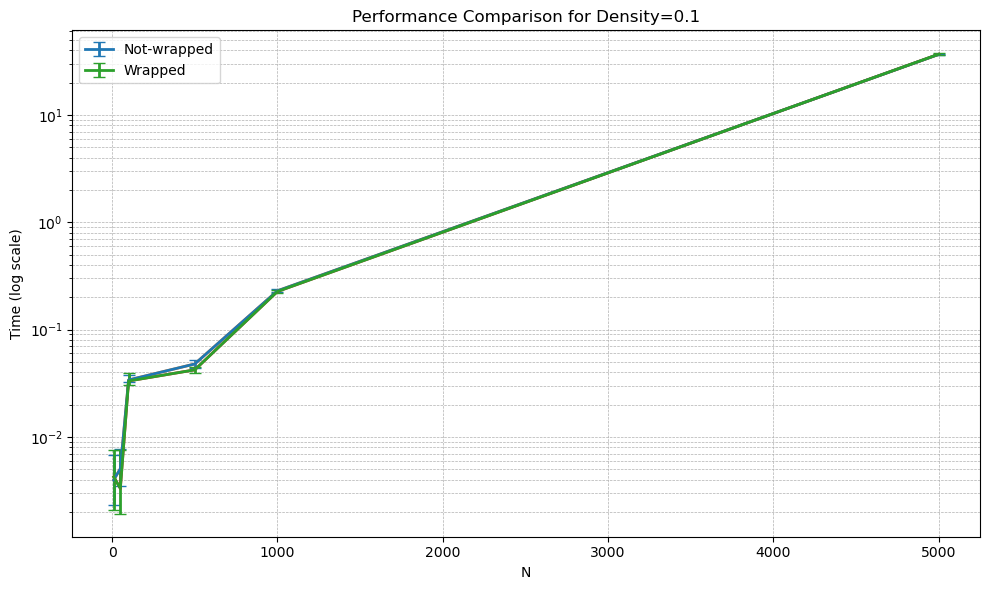

In [38]:
unique_density = stats['density'].unique()
for density in unique_density:
    subset = stats[stats['density'] == density]
    plt.figure(figsize=(10, 6))

    for solver in subset['Solver'].unique():
        solver_data = subset[subset['Solver'] == solver]
        plt.errorbar(
            solver_data['N'], solver_data['median'], 
            yerr=[solver_data['lower_error'], solver_data['upper_error']], 
            label=solver, linewidth=2, capsize=4
        )
        plt.plot(
            solver_data['N'], solver_data['median'], 
            label="_nolegend_", linewidth=2 
        )

    # plt.xscale('log')   
    plt.yscale('log')   
    plt.xlabel('N')
    plt.ylabel('Time (log scale)')
    plt.title(f'Performance Comparison for Density={density}')
    plt.legend()
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.tight_layout()

    filename = os.path.join(logy_dir, f"logy_density_{density}.png")
    plt.savefig(filename)
    print(f"Saved plot for Density={density} at {filename}")
    
    plt.show()

# Logx plots

In [39]:
logx_dir = os.path.join(save_dir, "logx")
os.makedirs(logx_dir, exist_ok=True)

Saved plot for N=10 at plots/vs_raw/logx/logx_N_10.png


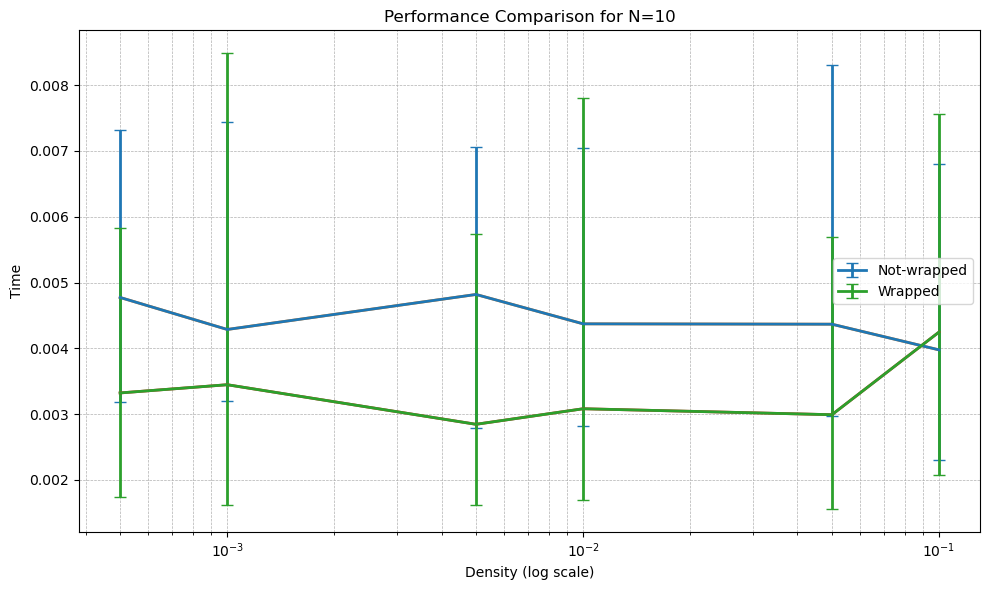

Saved plot for N=50 at plots/vs_raw/logx/logx_N_50.png


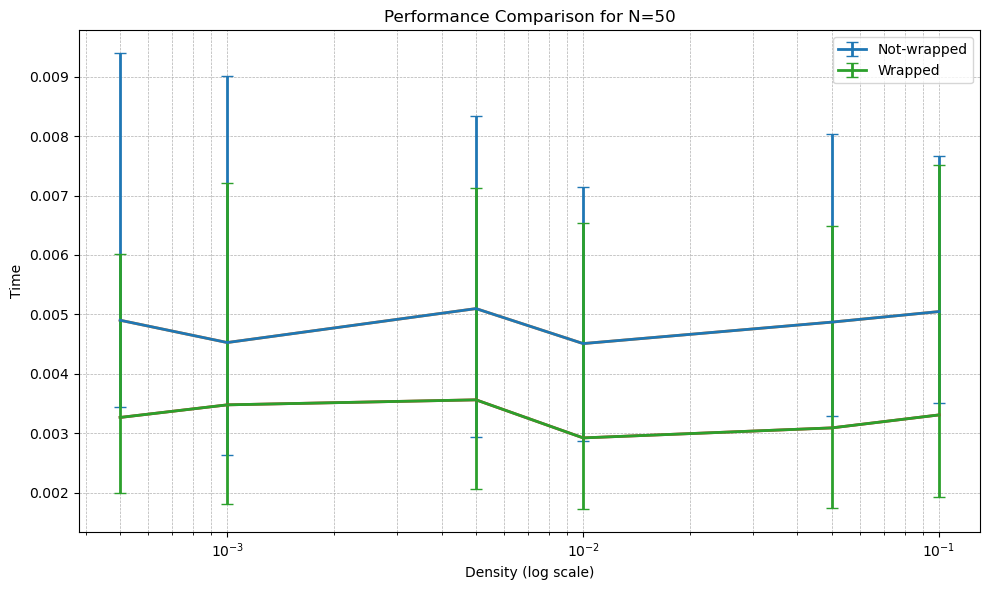

Saved plot for N=100 at plots/vs_raw/logx/logx_N_100.png


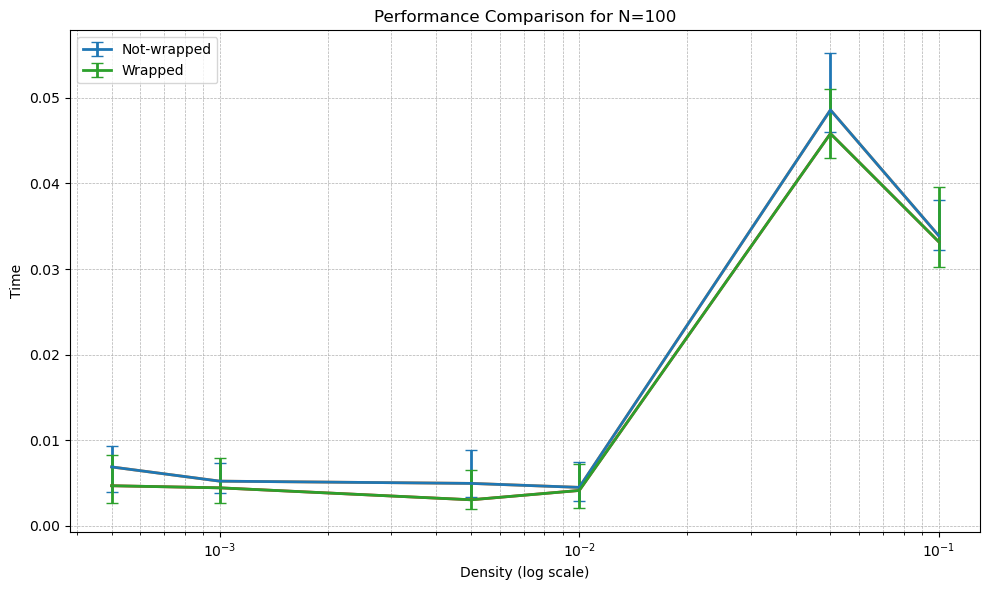

Saved plot for N=500 at plots/vs_raw/logx/logx_N_500.png


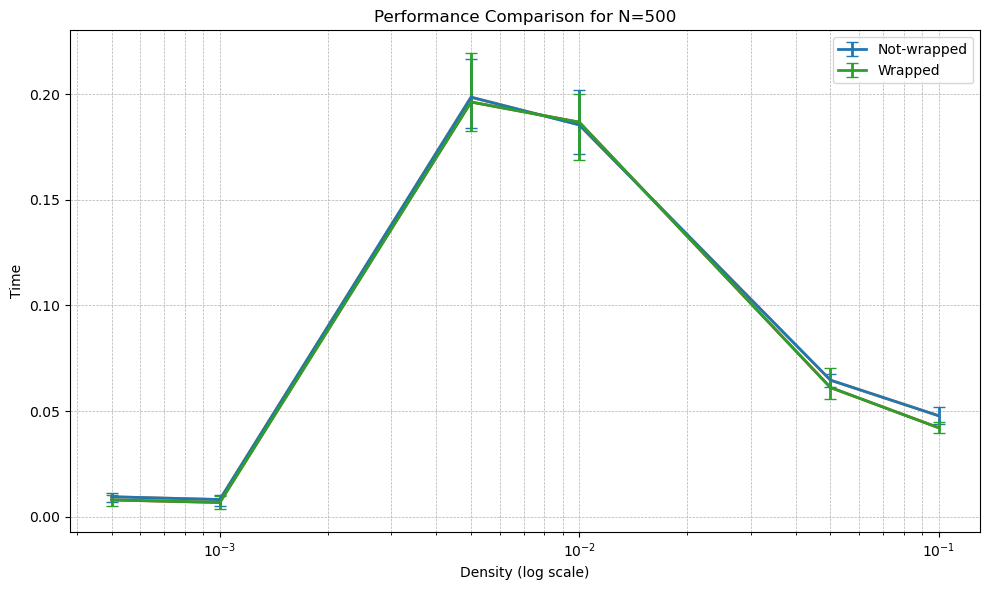

Saved plot for N=1000 at plots/vs_raw/logx/logx_N_1000.png


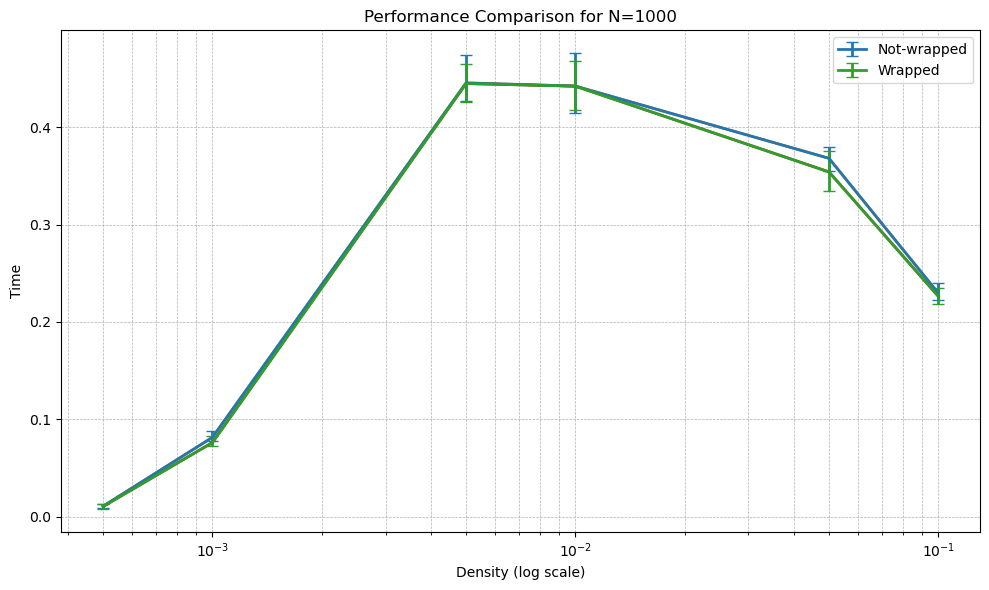

Saved plot for N=5000 at plots/vs_raw/logx/logx_N_5000.png


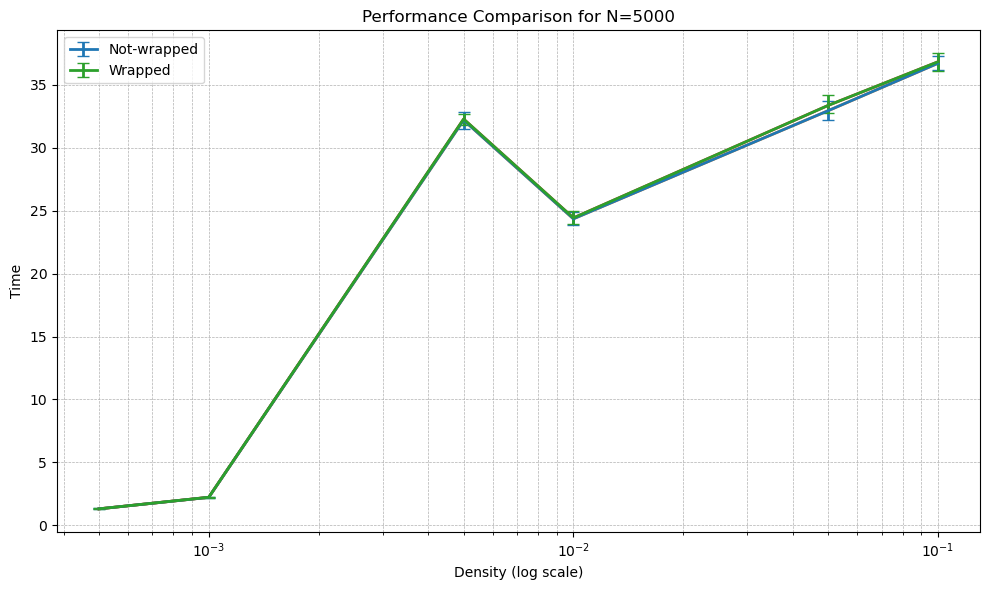

In [40]:
unique_N = stats['N'].unique()
for N in unique_N:
    subset = stats[stats['N'] == N]
    plt.figure(figsize=(10, 6))

    for solver in subset['Solver'].unique():
        solver_data = subset[subset['Solver'] == solver]
        plt.errorbar(
            solver_data['density'], solver_data['median'], 
            yerr=[solver_data['lower_error'], solver_data['upper_error']], 
            label=solver, linewidth=2, capsize=4
        )
        plt.plot(
            solver_data['density'], solver_data['median'], 
            label="_nolegend_", linewidth=2 
        )

    plt.xscale('log')   
    # plt.yscale('log')   
    plt.xlabel('Density (log scale)')
    plt.ylabel('Time')
    plt.title(f'Performance Comparison for N={N}')
    plt.legend()
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.tight_layout()

    filename = os.path.join(logx_dir, f"logx_N_{N}.png")
    plt.savefig(filename)
    print(f"Saved plot for N={N} at {filename}")
    
    plt.show()

Saved plot for Density=0.0005 at plots/vs_raw/logx/logx_density_0.0005.png


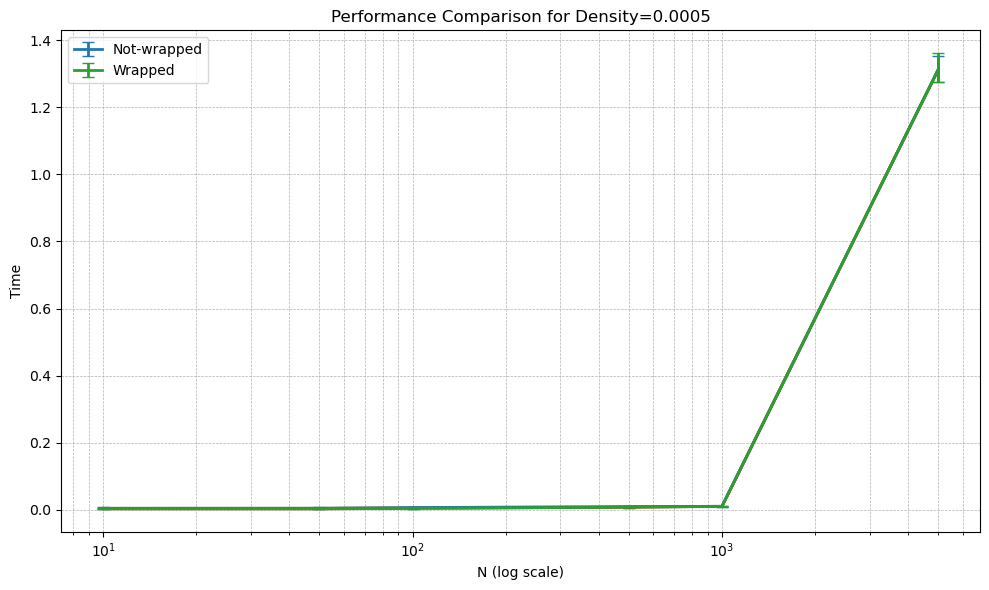

Saved plot for Density=0.001 at plots/vs_raw/logx/logx_density_0.001.png


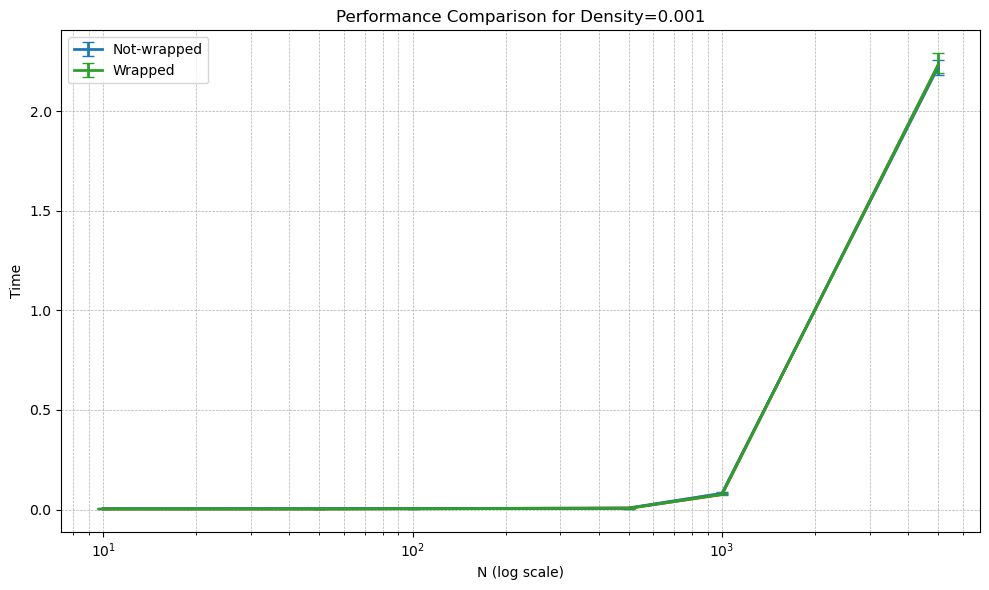

Saved plot for Density=0.005 at plots/vs_raw/logx/logx_density_0.005.png


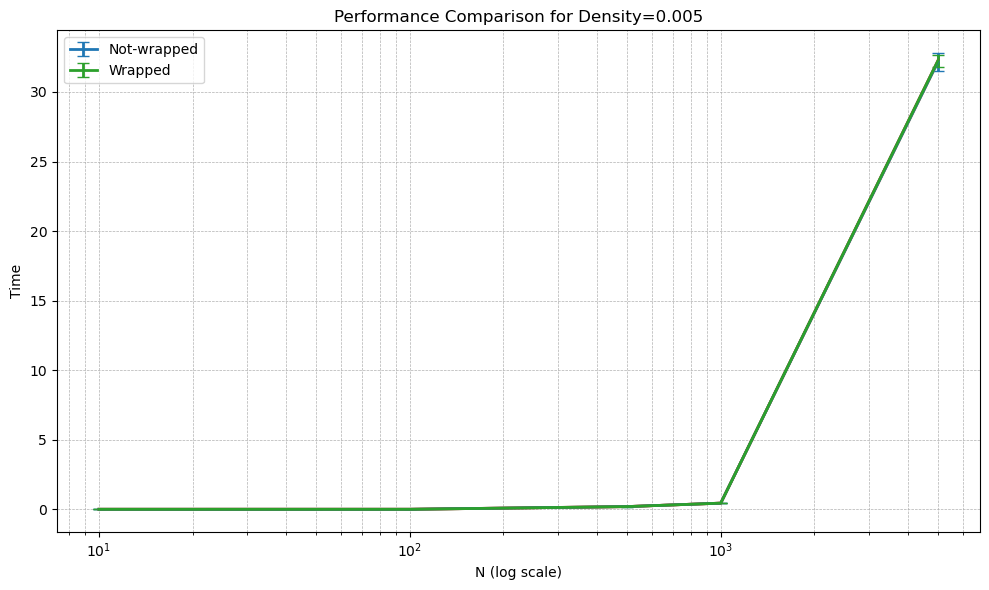

Saved plot for Density=0.01 at plots/vs_raw/logx/logx_density_0.01.png


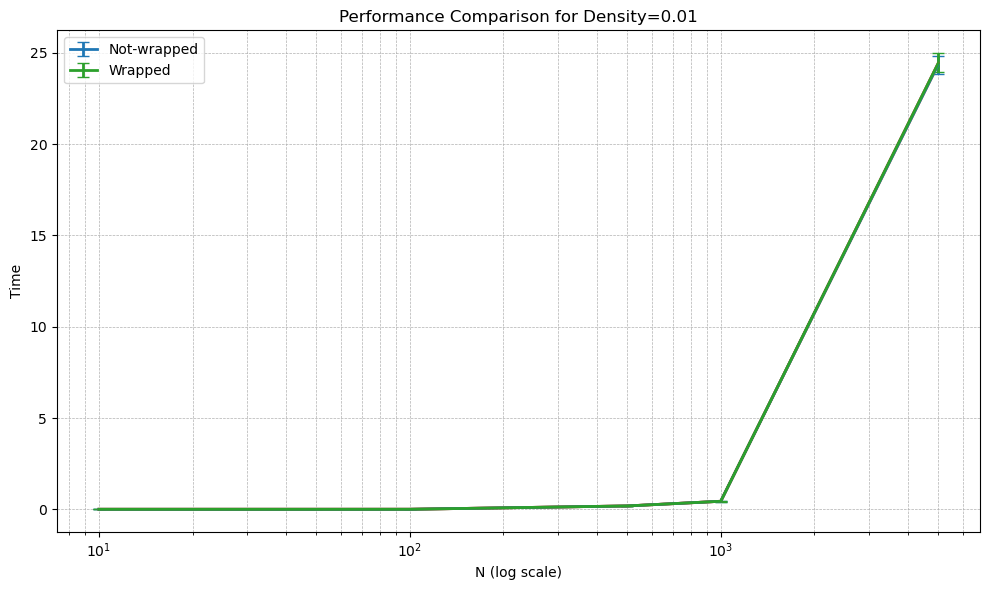

Saved plot for Density=0.05 at plots/vs_raw/logx/logx_density_0.05.png


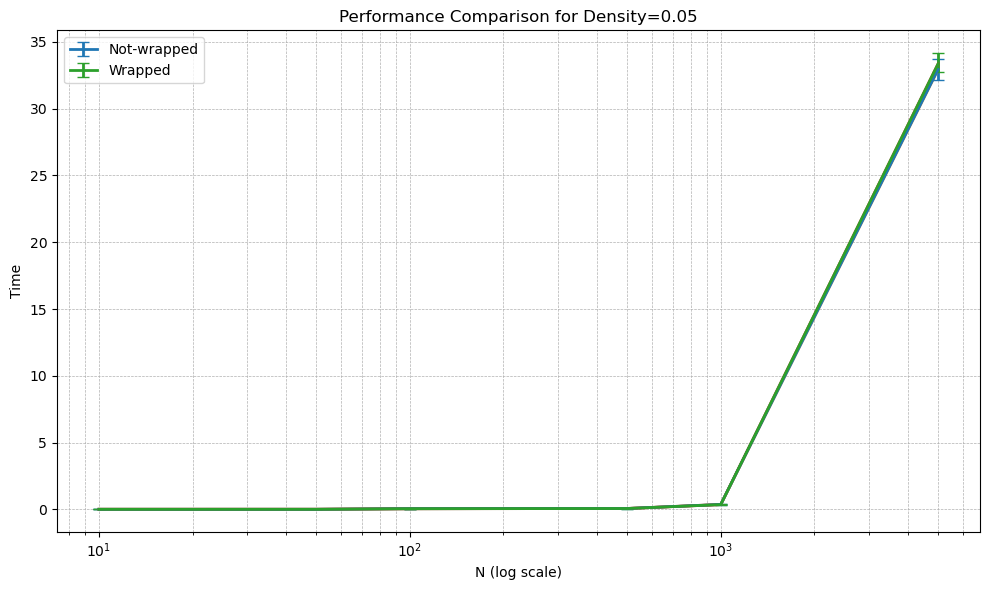

Saved plot for Density=0.1 at plots/vs_raw/logx/logx_density_0.1.png


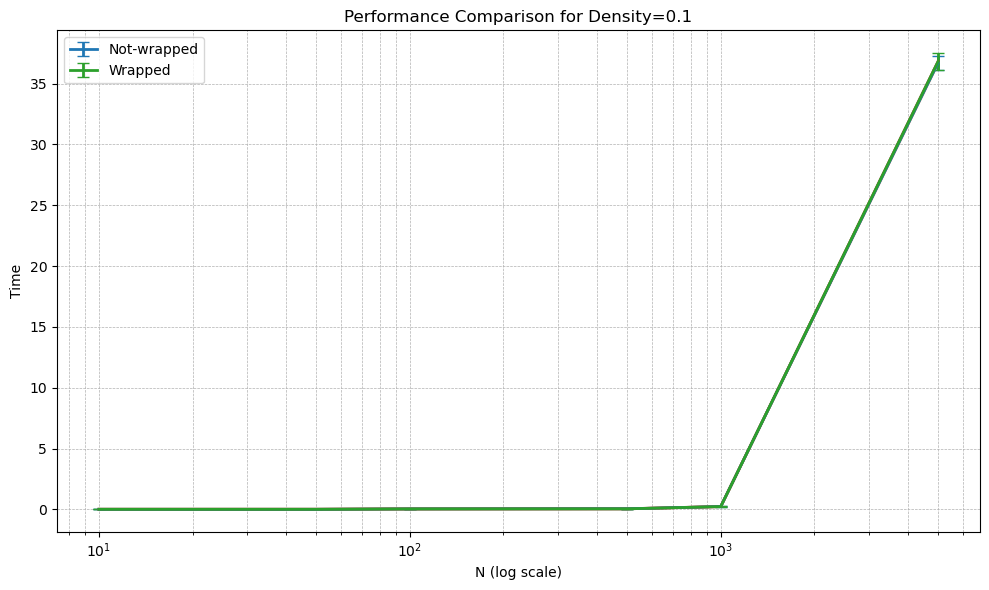

In [41]:
unique_density = stats['density'].unique()
for density in unique_density:
    subset = stats[stats['density'] == density]
    plt.figure(figsize=(10, 6))

    for solver in subset['Solver'].unique():
        solver_data = subset[subset['Solver'] == solver]
        plt.errorbar(
            solver_data['N'], solver_data['median'], 
            yerr=[solver_data['lower_error'], solver_data['upper_error']], 
            label=solver, linewidth=2, capsize=4
        )
        plt.plot(
            solver_data['N'], solver_data['median'], 
            label="_nolegend_", linewidth=2 
        )

    plt.xscale('log')   
    # plt.yscale('log')   
    plt.xlabel('N (log scale)')
    plt.ylabel('Time')
    plt.title(f'Performance Comparison for Density={density}')
    plt.legend()
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.tight_layout()

    filename = os.path.join(logx_dir, f"logx_density_{density}.png")
    plt.savefig(filename)
    print(f"Saved plot for Density={density} at {filename}")
    
    plt.show()

In [42]:
# Load data
filename = "data/rand_computation_times.csv"
data = pd.read_csv(filename)
save_dir = "plots/rand"

os.makedirs(save_dir, exist_ok=True)

data.head()

Solver   N  density      time
0  SparseLU  10      0.1  0.002071
1  SparseLU  10      0.1  0.000077
2  SparseLU  10      0.1  0.000027
3  SparseLU  10      0.1  0.000030
4  SparseLU  10      0.1  0.001144

In [43]:
stats = data.groupby(['Solver', 'N', 'density'])['time'].agg(
    q1=lambda x: x.quantile(0.25),
    median='median',
    q3=lambda x: x.quantile(0.75)
).reset_index()

# Calculate error bars
stats['lower_error'] = stats['median'] - stats['q1']
stats['upper_error'] = stats['q3'] - stats['median']

stats

Solver     N  density          q1      median          q3  lower_error  \
0    MumpsBLR    10   0.0005    0.037374    0.041149    0.043806     0.003775   
1    MumpsBLR    10   0.0010    0.038115    0.041381    0.044462     0.003266   
2    MumpsBLR    10   0.0050    0.037201    0.040466    0.043955     0.003265   
3    MumpsBLR    10   0.0100    0.036494    0.040741    0.044546     0.004246   
4    MumpsBLR    10   0.0500    0.037227    0.040196    0.045174     0.002970   
..        ...   ...      ...         ...         ...         ...          ...   
103  SparseLU  5000   0.0010   34.165175   34.533550   35.000300     0.368375   
104  SparseLU  5000   0.0050  138.353500  138.735500  139.517750     0.382000   
105  SparseLU  5000   0.0100  130.377250  130.897000  131.313000     0.519750   
106  SparseLU  5000   0.0500   73.411725   73.997800   74.575775     0.586075   
107  SparseLU  5000   0.1000   69.895325   70.227250   70.723000     0.331925   

     upper_error  
0       0.002657  
1       0.003081  
2       0.003489  
3       0.003805  
4       0.004978  
..           ...  
103     0.466750  
104     0.782250  
105     0.416000  
106     0.577975  
107     0.495750  

[108 rows x 8 columns]

# Plots

Saved plot for N=10 at plots/rand/N_10.png


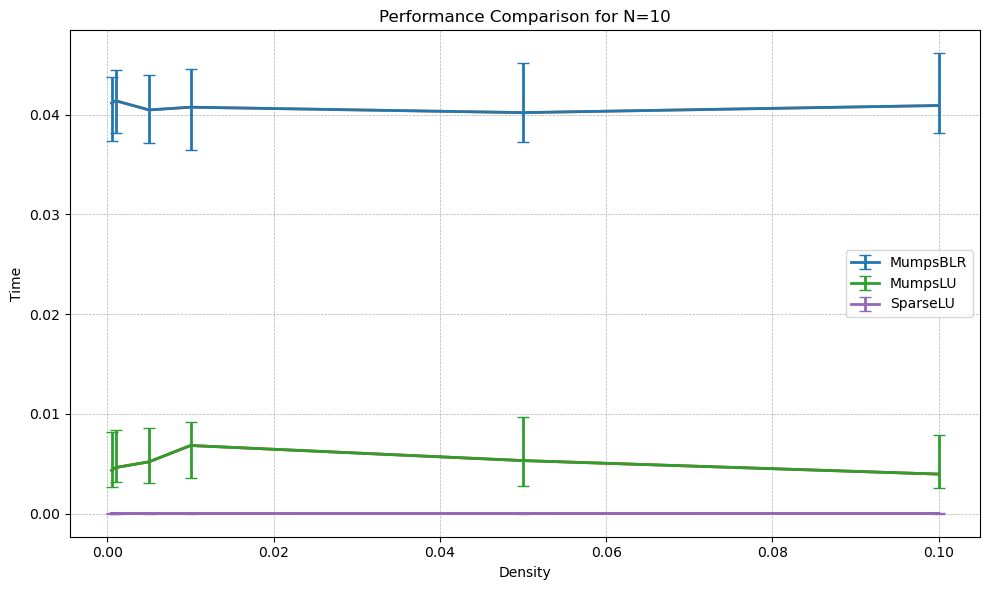

Saved plot for N=50 at plots/rand/N_50.png


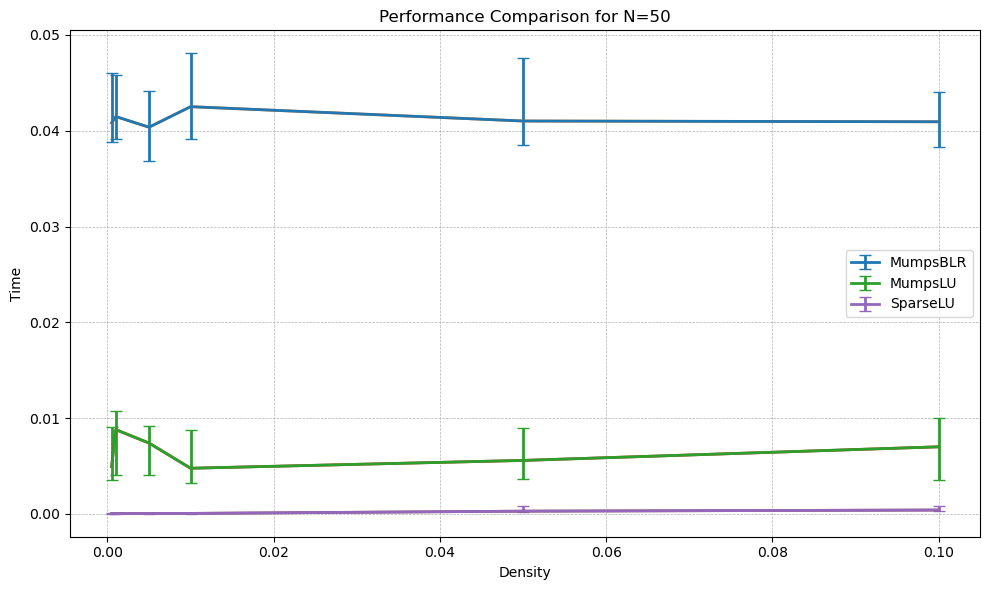

Saved plot for N=100 at plots/rand/N_100.png


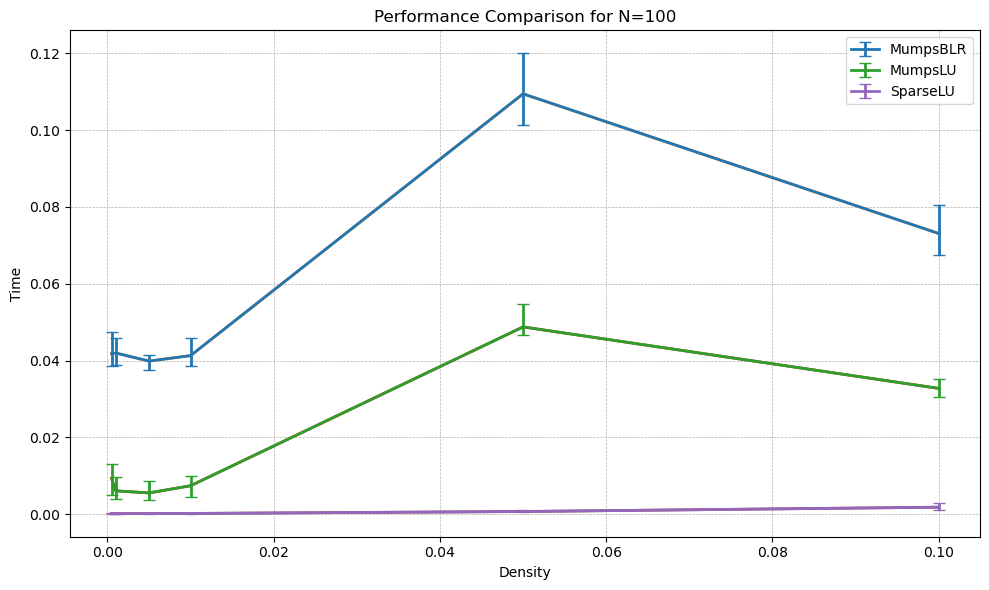

Saved plot for N=500 at plots/rand/N_500.png


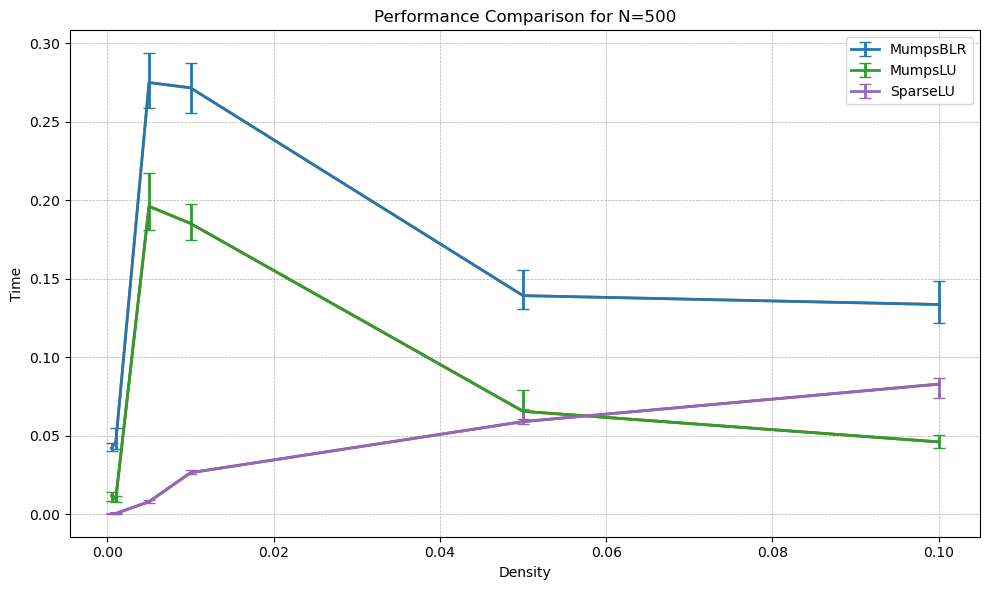

Saved plot for N=1000 at plots/rand/N_1000.png


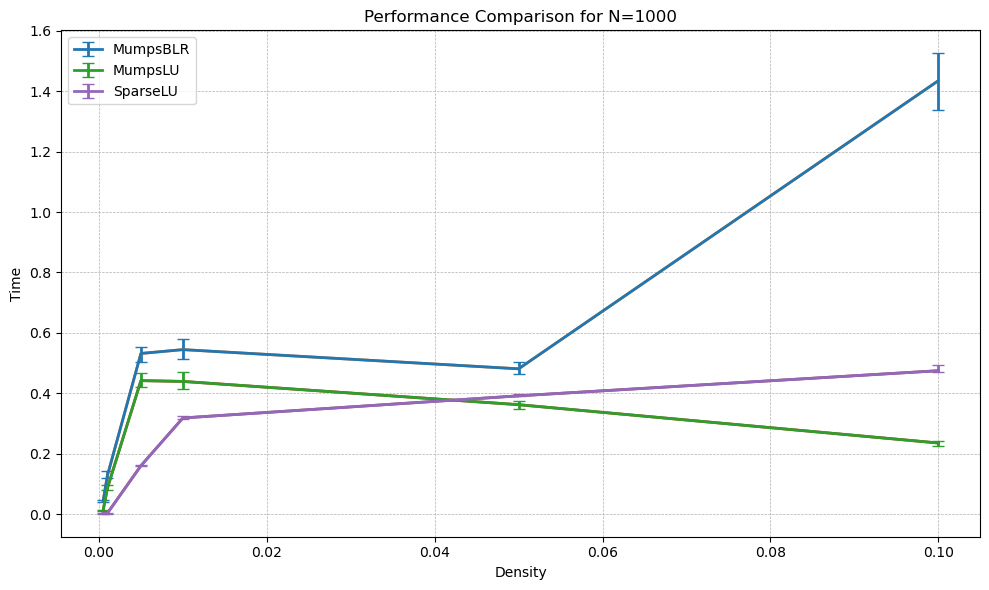

Saved plot for N=5000 at plots/rand/N_5000.png


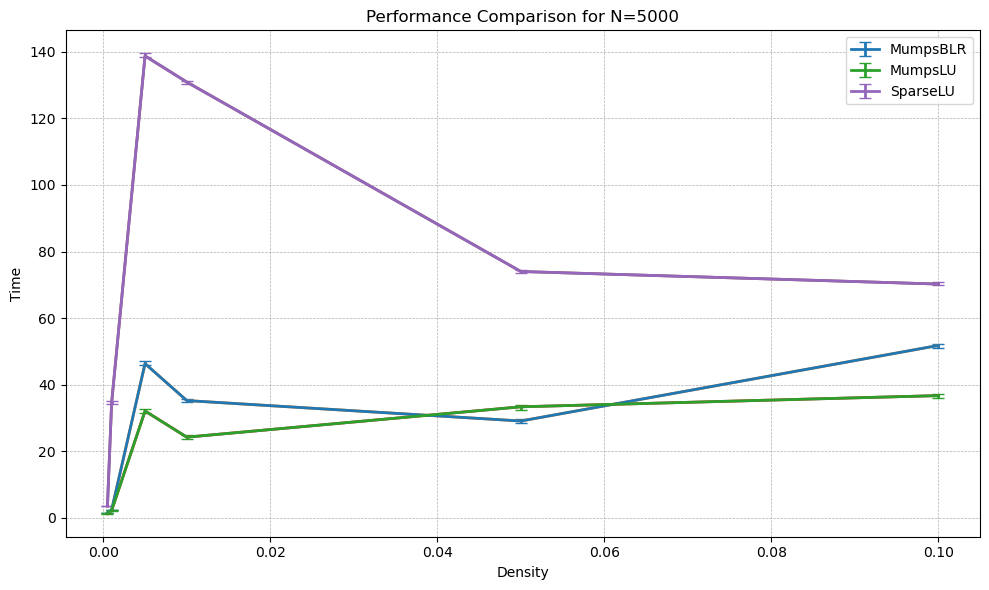

In [44]:
unique_N = stats['N'].unique()
for N in unique_N:
    subset = stats[stats['N'] == N]
    plt.figure(figsize=(10, 6))

    for solver in subset['Solver'].unique():
        solver_data = subset[subset['Solver'] == solver]
        plt.errorbar(
            solver_data['density'], solver_data['median'], 
            yerr=[solver_data['lower_error'], solver_data['upper_error']], 
            label=solver, linewidth=2, capsize=4
        )
        plt.plot(
            solver_data['density'], solver_data['median'], 
            label="_nolegend_", linewidth=2
        )

    # plt.xscale('log')
    # plt.yscale('log')
    plt.xlabel('Density')
    plt.ylabel('Time')
    plt.title(f'Performance Comparison for N={N}')
    plt.legend()
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.tight_layout()

    filename = os.path.join(save_dir, f"N_{N}.png")
    plt.savefig(filename)
    print(f"Saved plot for N={N} at {filename}")
    
    plt.show()

Saved plot for Density=0.0005 at plots/rand/density_0.0005.png


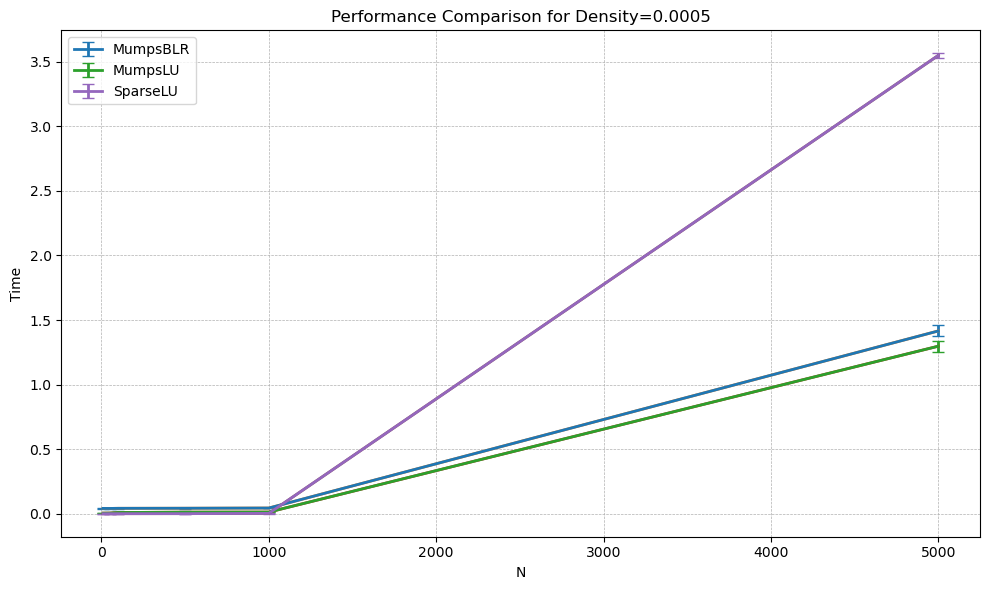

Saved plot for Density=0.001 at plots/rand/density_0.001.png


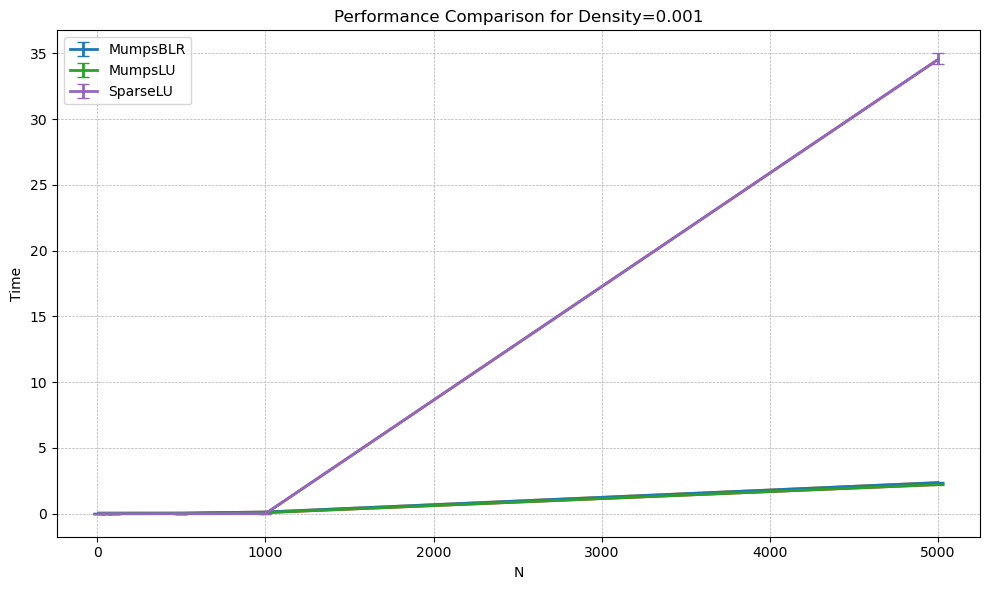

Saved plot for Density=0.005 at plots/rand/density_0.005.png


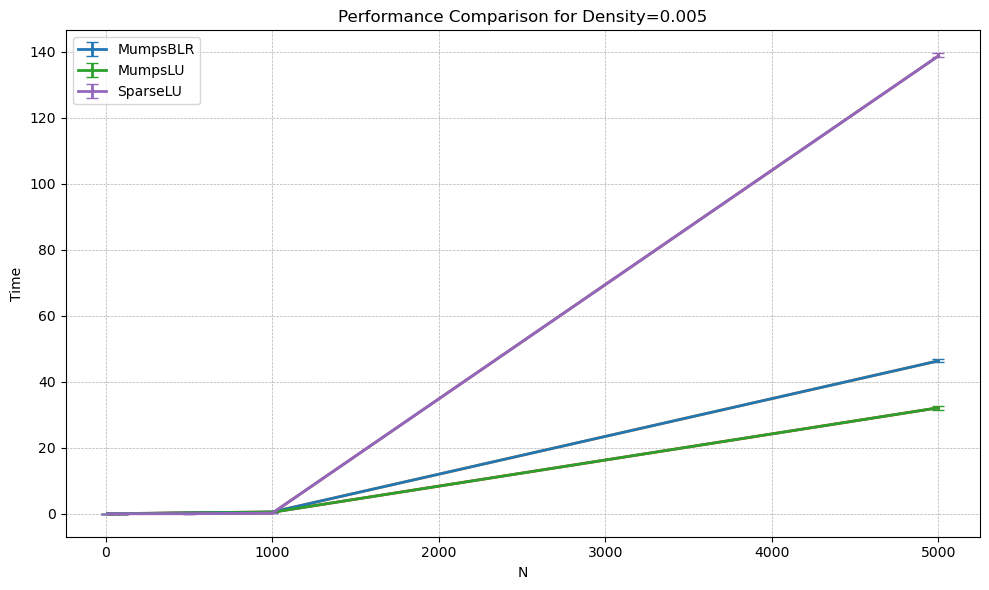

Saved plot for Density=0.01 at plots/rand/density_0.01.png


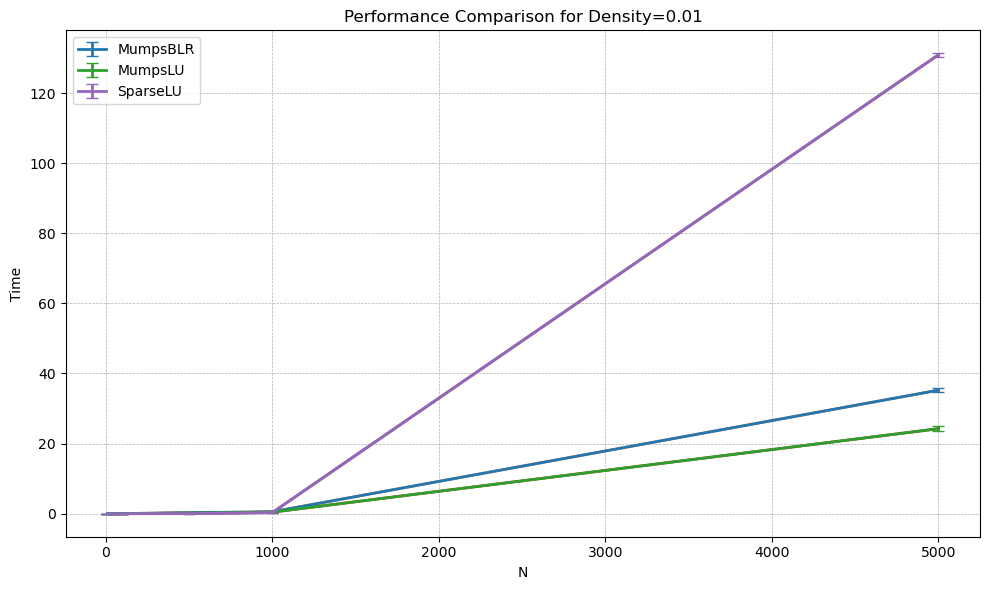

Saved plot for Density=0.05 at plots/rand/density_0.05.png


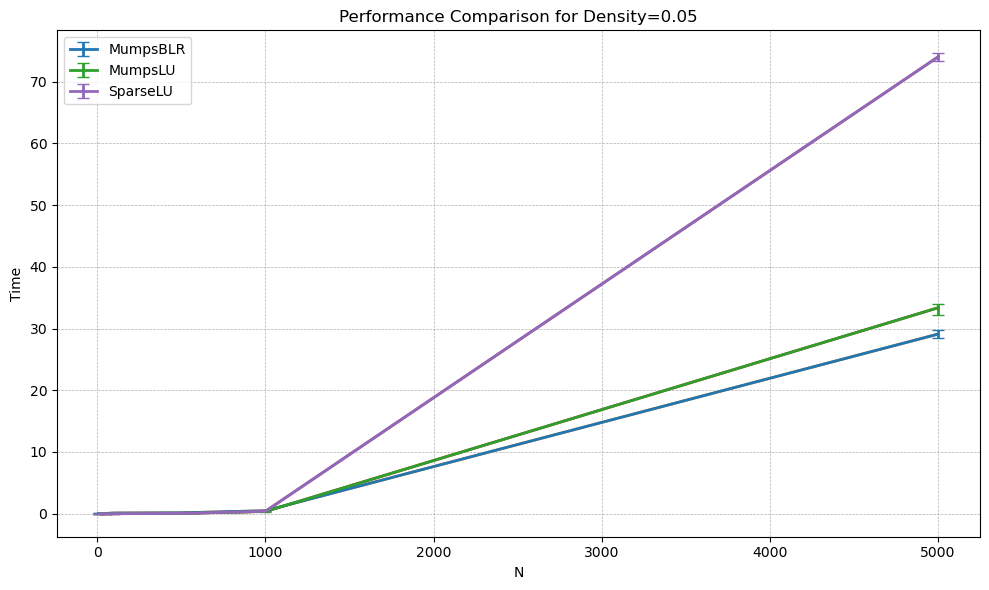

Saved plot for Density=0.1 at plots/rand/density_0.1.png


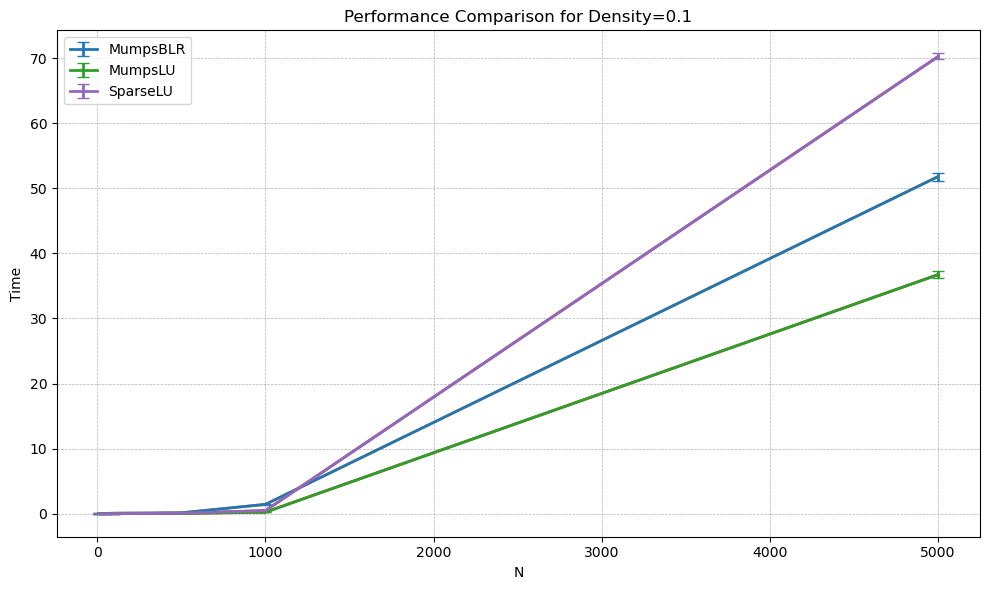

In [45]:
unique_density = stats['density'].unique()
for density in unique_density:
    subset = stats[stats['density'] == density]
    plt.figure(figsize=(10, 6))

    for solver in subset['Solver'].unique():
        solver_data = subset[subset['Solver'] == solver]
        plt.errorbar(
            solver_data['N'], solver_data['median'], 
            yerr=[solver_data['lower_error'], solver_data['upper_error']], 
            label=solver, linewidth=2, capsize=4
        )
        plt.plot(
            solver_data['N'], solver_data['median'], 
            label="_nolegend_", linewidth=2
        )

    # plt.xscale('log')
    # plt.yscale('log')
    plt.xlabel('N')
    plt.ylabel('Time')
    plt.title(f'Performance Comparison for Density={density}')
    plt.legend()
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.tight_layout()

    filename = os.path.join(save_dir, f"density_{density}.png")
    plt.savefig(filename)
    print(f"Saved plot for Density={density} at {filename}")
    
    plt.show()

# Loglog plots

In [46]:
loglog_dir = os.path.join(save_dir, "loglog")
os.makedirs(loglog_dir, exist_ok=True)

Saved plot for N=10 at plots/rand/loglog/loglog_N_10.png


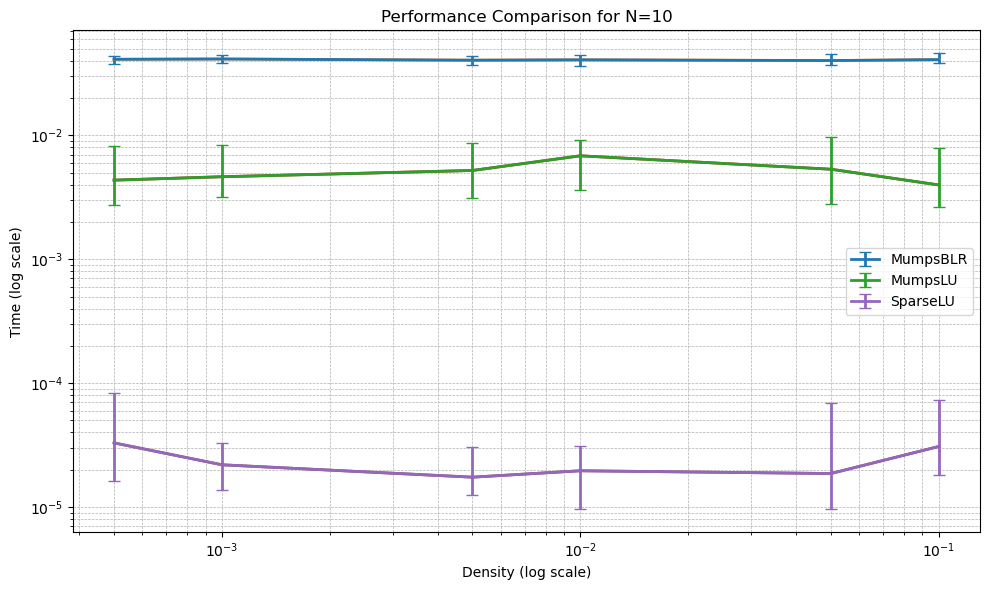

Saved plot for N=50 at plots/rand/loglog/loglog_N_50.png


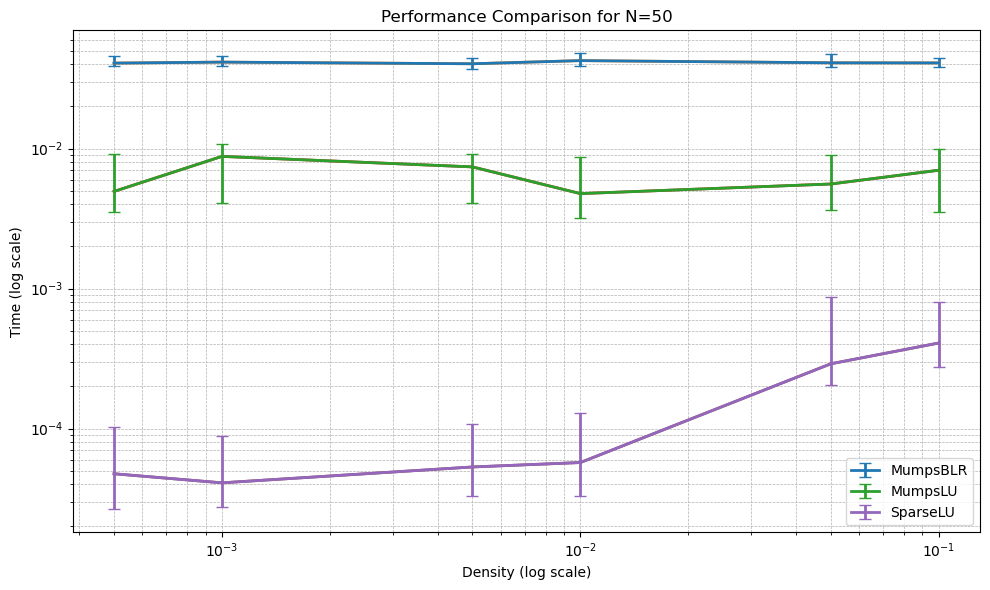

Saved plot for N=100 at plots/rand/loglog/loglog_N_100.png


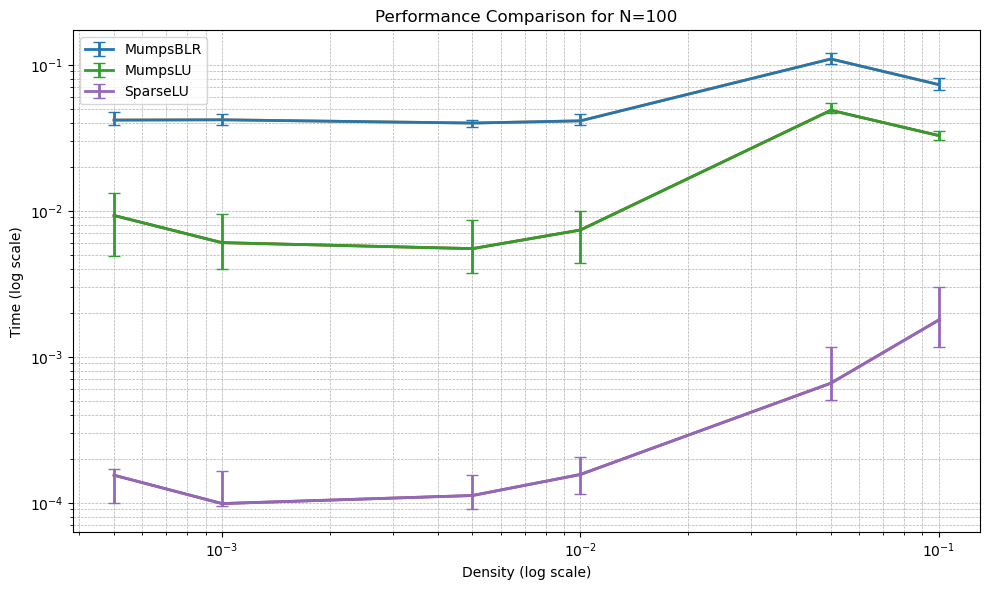

Saved plot for N=500 at plots/rand/loglog/loglog_N_500.png


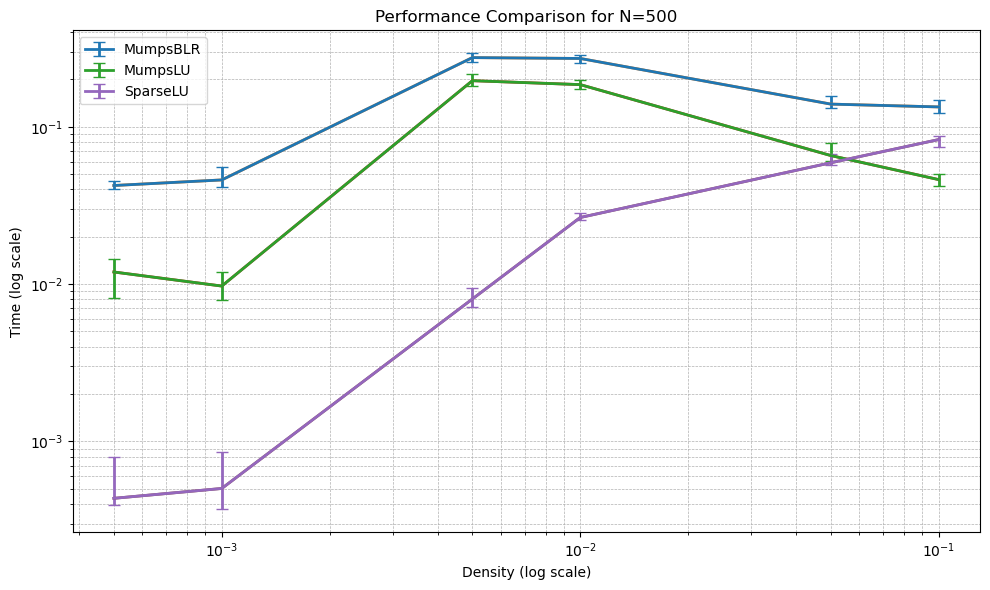

Saved plot for N=1000 at plots/rand/loglog/loglog_N_1000.png


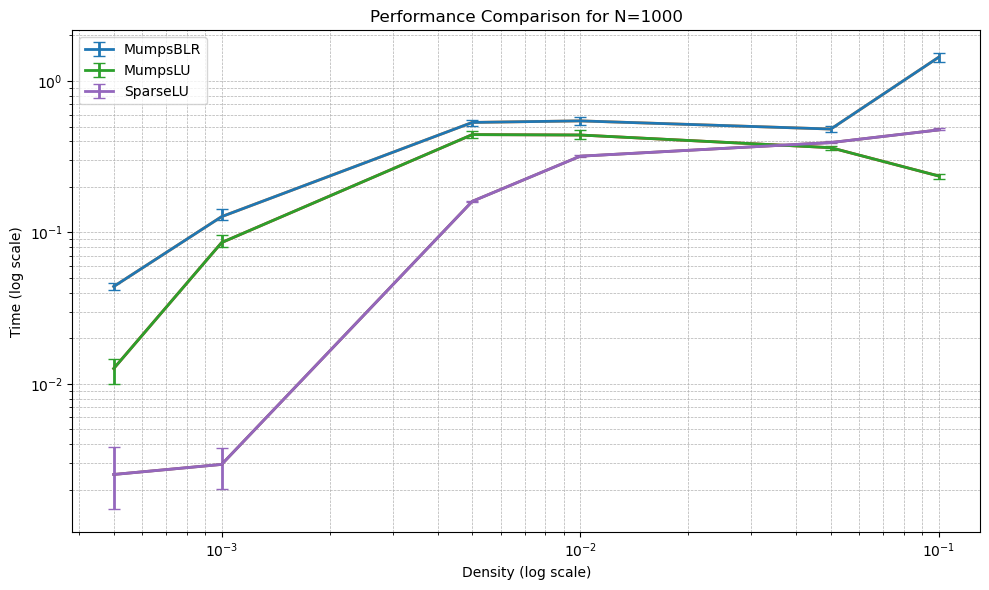

Saved plot for N=5000 at plots/rand/loglog/loglog_N_5000.png


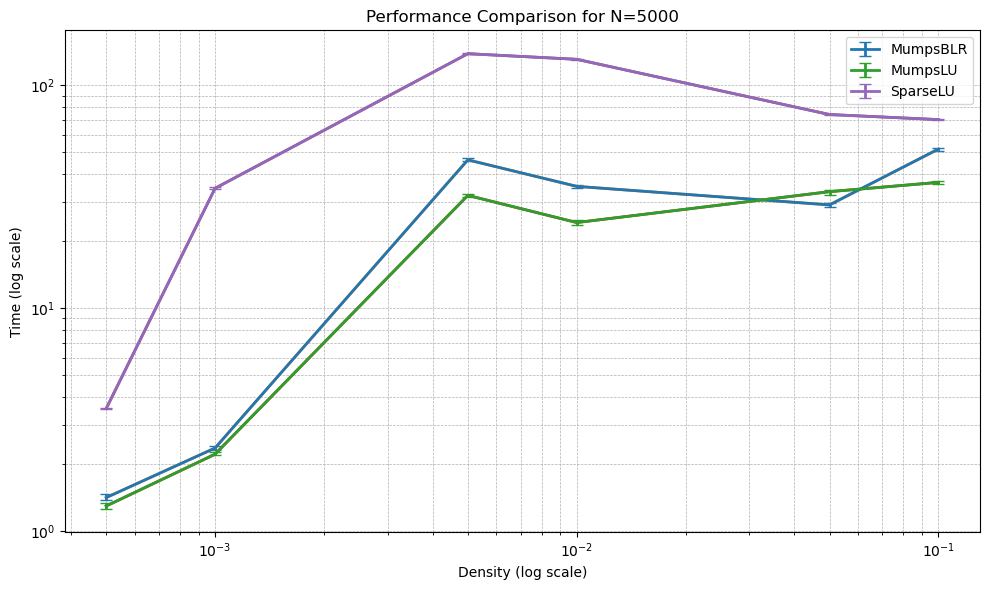

In [47]:
unique_N = stats['N'].unique()
for N in unique_N:
    subset = stats[stats['N'] == N]
    plt.figure(figsize=(10, 6))

    for solver in subset['Solver'].unique():
        solver_data = subset[subset['Solver'] == solver]
        plt.errorbar(
            solver_data['density'], solver_data['median'], 
            yerr=[solver_data['lower_error'], solver_data['upper_error']], 
            label=solver, linewidth=2, capsize=4
        )
        plt.plot(
            solver_data['density'], solver_data['median'], 
            label="_nolegend_", linewidth=2
        )

    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Density (log scale)')
    plt.ylabel('Time (log scale)')
    plt.title(f'Performance Comparison for N={N}')
    plt.legend()
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.tight_layout()

    filename = os.path.join(loglog_dir, f"loglog_N_{N}.png")
    plt.savefig(filename)
    print(f"Saved plot for N={N} at {filename}")
    
    plt.show()

Saved plot for Density=0.0005 at plots/rand/loglog/loglog_density_0.0005.png


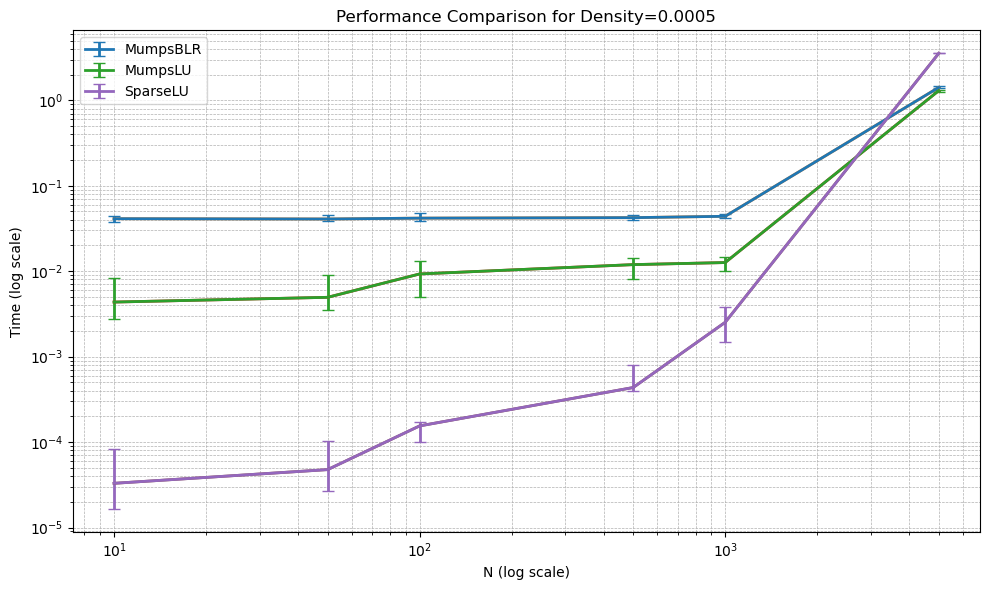

Saved plot for Density=0.001 at plots/rand/loglog/loglog_density_0.001.png


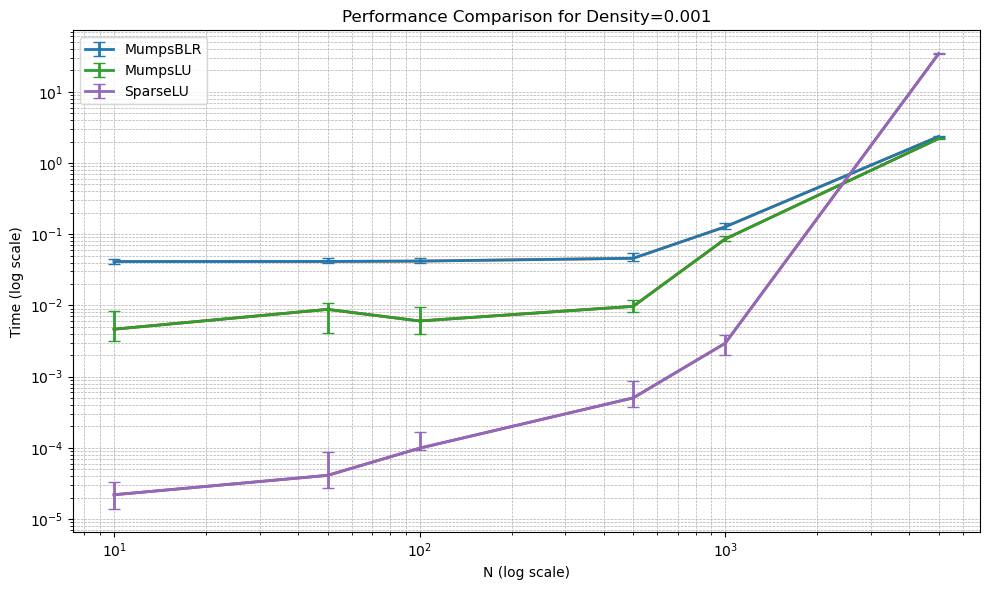

Saved plot for Density=0.005 at plots/rand/loglog/loglog_density_0.005.png


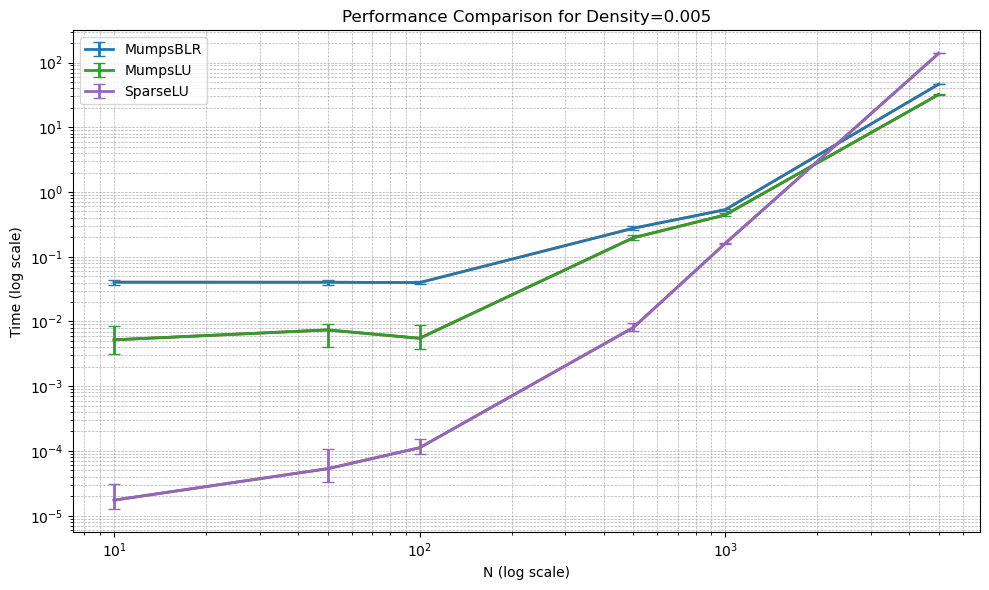

Saved plot for Density=0.01 at plots/rand/loglog/loglog_density_0.01.png


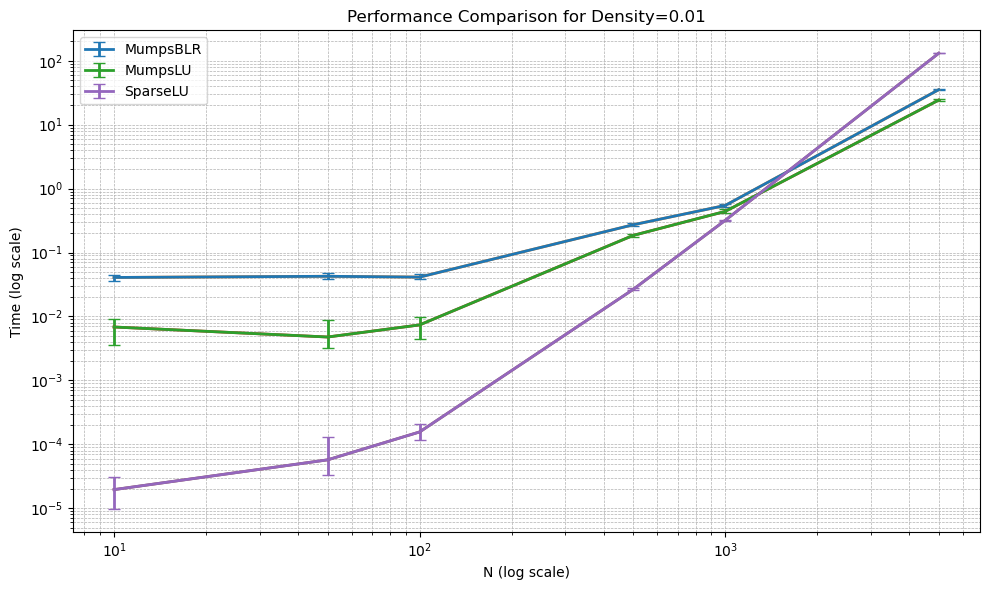

Saved plot for Density=0.05 at plots/rand/loglog/loglog_density_0.05.png


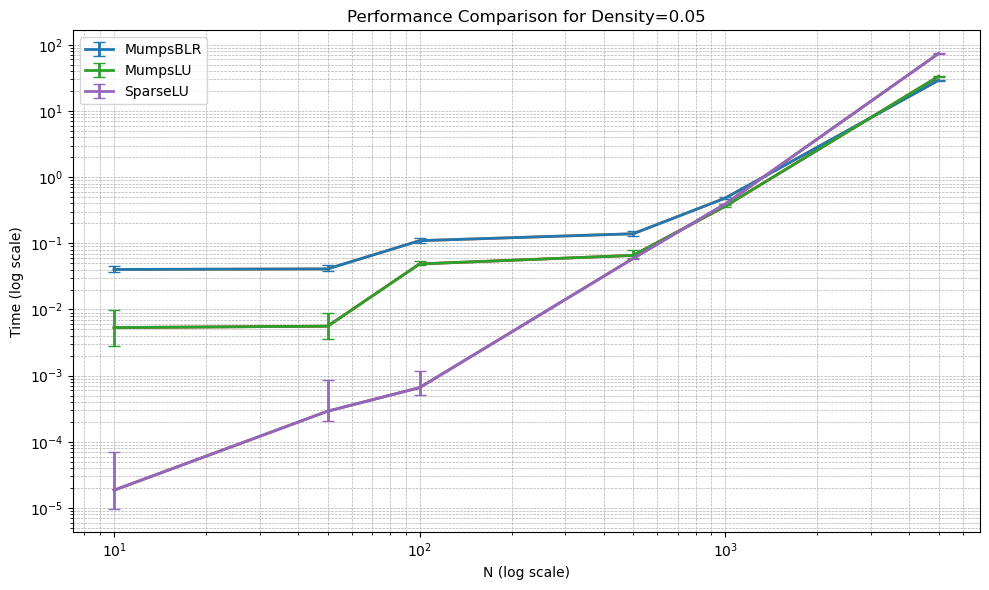

Saved plot for Density=0.1 at plots/rand/loglog/loglog_density_0.1.png


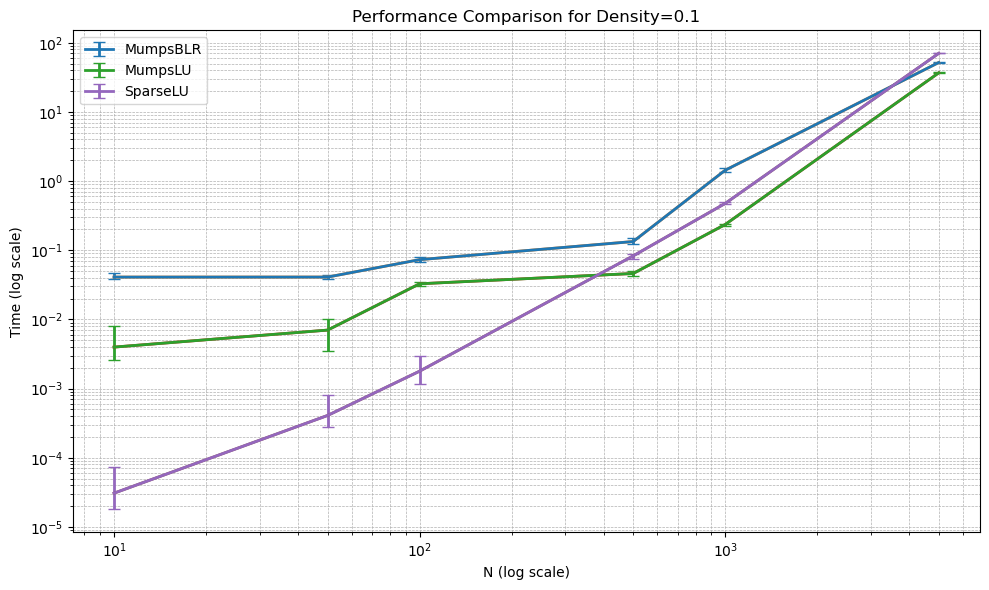

In [48]:
unique_density = stats['density'].unique()
for density in unique_density:
    subset = stats[stats['density'] == density]
    plt.figure(figsize=(10, 6))

    for solver in subset['Solver'].unique():
        solver_data = subset[subset['Solver'] == solver]
        plt.errorbar(
            solver_data['N'], solver_data['median'], 
            yerr=[solver_data['lower_error'], solver_data['upper_error']], 
            label=solver, linewidth=2, capsize=4
        )
        plt.plot(
            solver_data['N'], solver_data['median'], 
            label="_nolegend_", linewidth=2
        )

    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('N (log scale)')
    plt.ylabel('Time (log scale)')
    plt.title(f'Performance Comparison for Density={density}')
    plt.legend()
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.tight_layout()

    filename = os.path.join(loglog_dir, f"loglog_density_{density}.png")
    plt.savefig(filename)
    print(f"Saved plot for Density={density} at {filename}")
    
    plt.show()

# Logy plots

In [49]:
logy_dir = os.path.join(save_dir, "logy")
os.makedirs(logy_dir, exist_ok=True)

Saved plot for N=10 at plots/rand/logy/logy_N_10.png


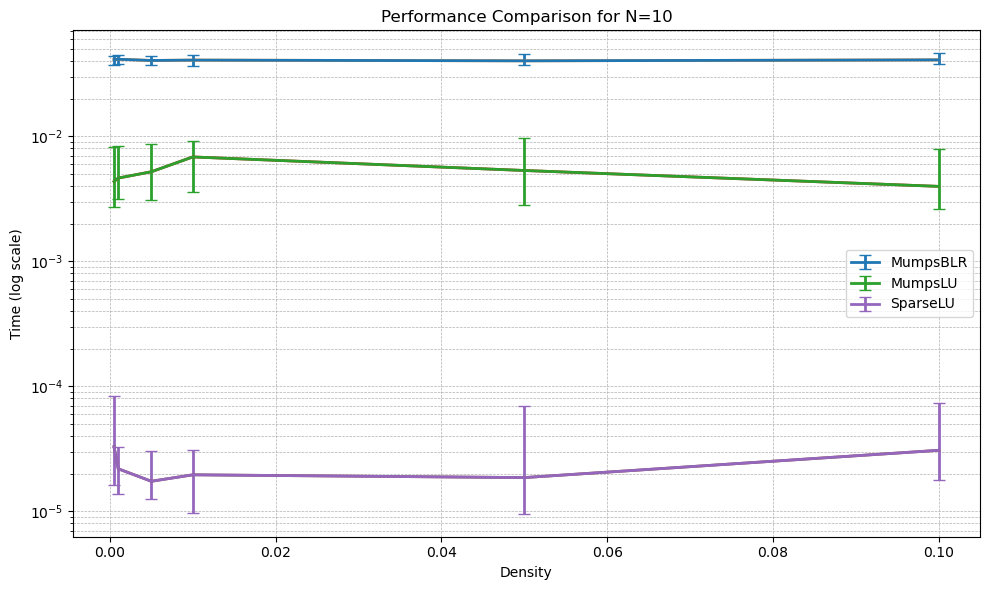

Saved plot for N=50 at plots/rand/logy/logy_N_50.png


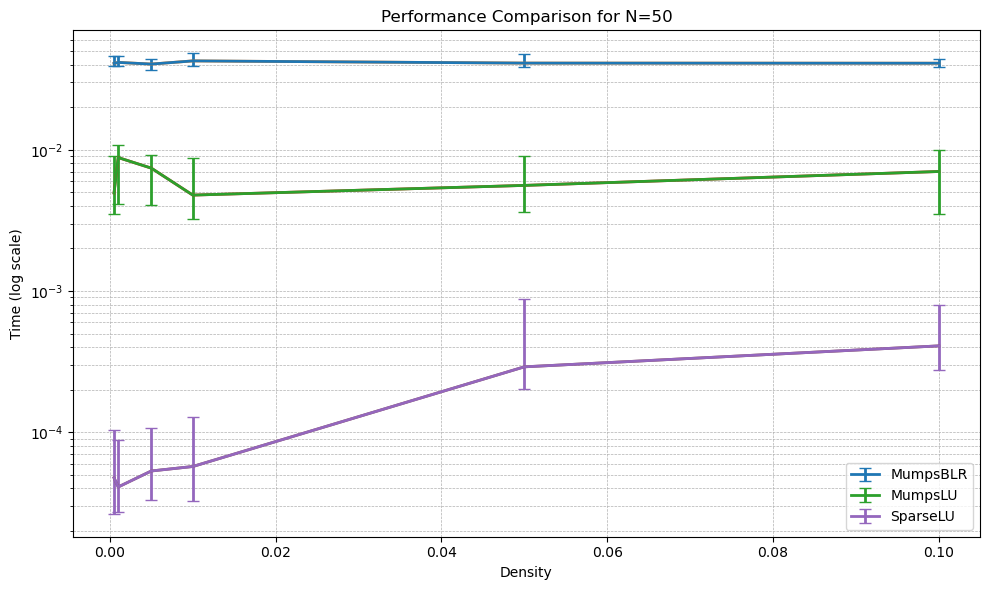

Saved plot for N=100 at plots/rand/logy/logy_N_100.png


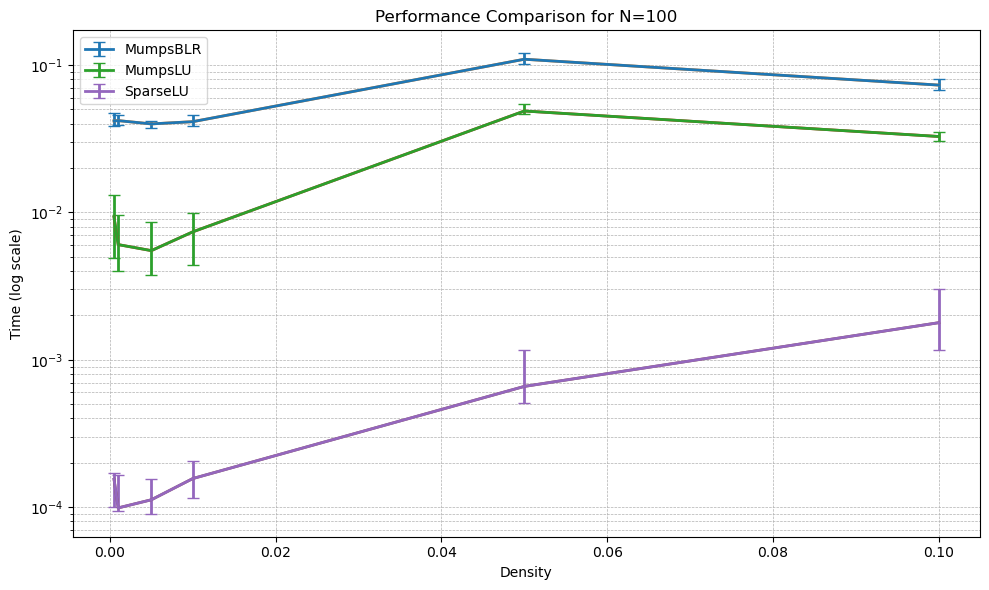

Saved plot for N=500 at plots/rand/logy/logy_N_500.png


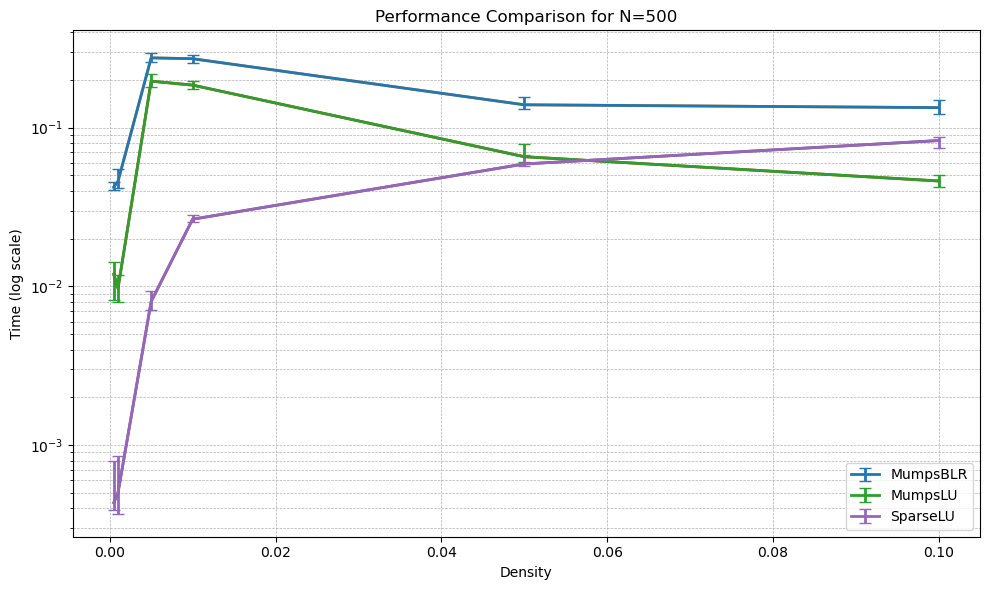

Saved plot for N=1000 at plots/rand/logy/logy_N_1000.png


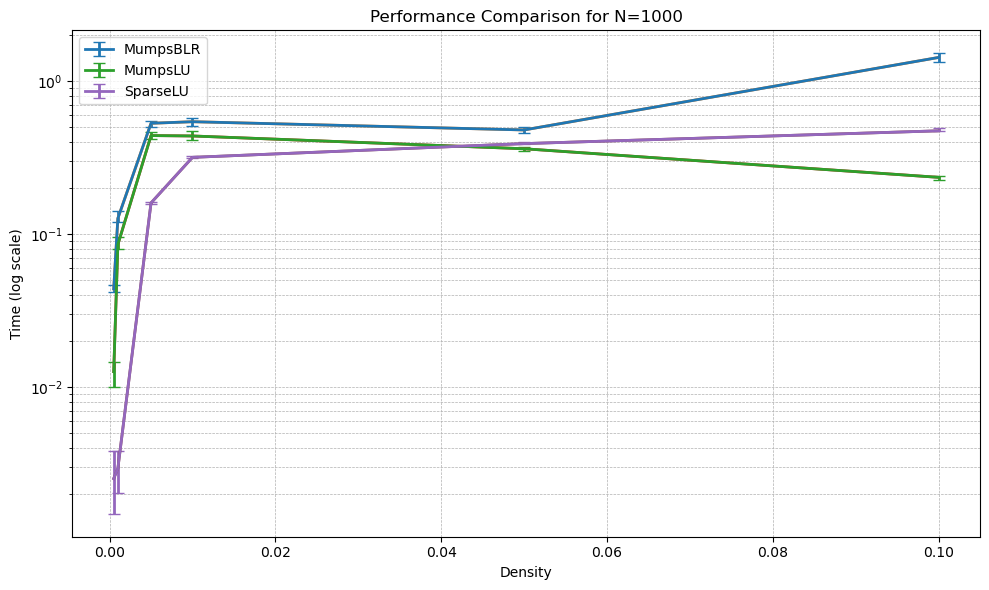

Saved plot for N=5000 at plots/rand/logy/logy_N_5000.png


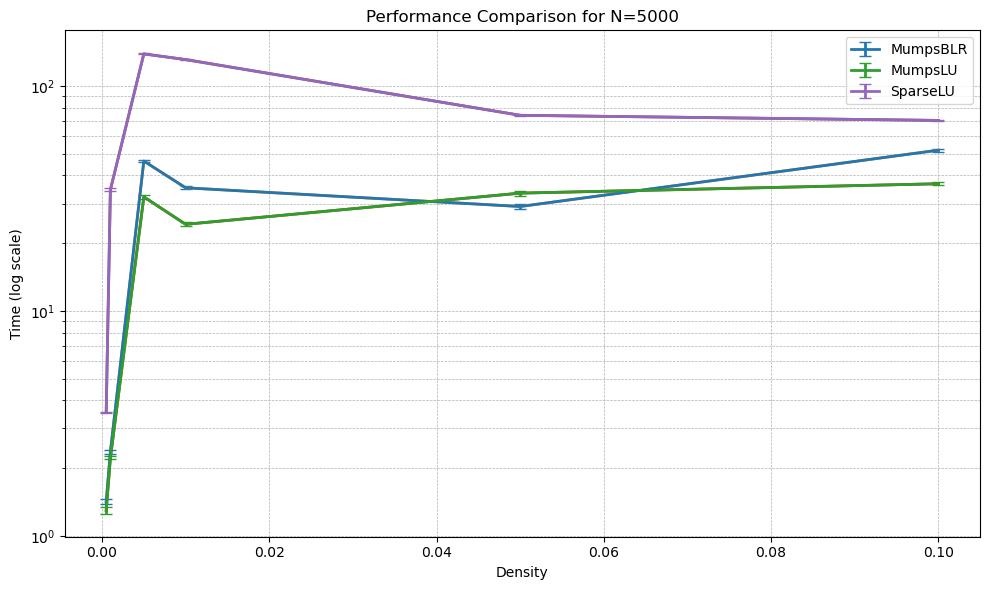

In [50]:
unique_N = stats['N'].unique()
for N in unique_N:
    subset = stats[stats['N'] == N]
    plt.figure(figsize=(10, 6))

    for solver in subset['Solver'].unique():
        solver_data = subset[subset['Solver'] == solver]
        plt.errorbar(
            solver_data['density'], solver_data['median'], 
            yerr=[solver_data['lower_error'], solver_data['upper_error']], 
            label=solver, linewidth=2, capsize=4
        )
        plt.plot(
            solver_data['density'], solver_data['median'], 
            label="_nolegend_", linewidth=2 
        )

    # plt.xscale('log')   
    plt.yscale('log')   
    plt.xlabel('Density')
    plt.ylabel('Time (log scale)')
    plt.title(f'Performance Comparison for N={N}')
    plt.legend()
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.tight_layout()

    filename = os.path.join(logy_dir, f"logy_N_{N}.png")
    plt.savefig(filename)
    print(f"Saved plot for N={N} at {filename}")
    
    plt.show()

Saved plot for Density=0.0005 at plots/rand/logy/logy_density_0.0005.png


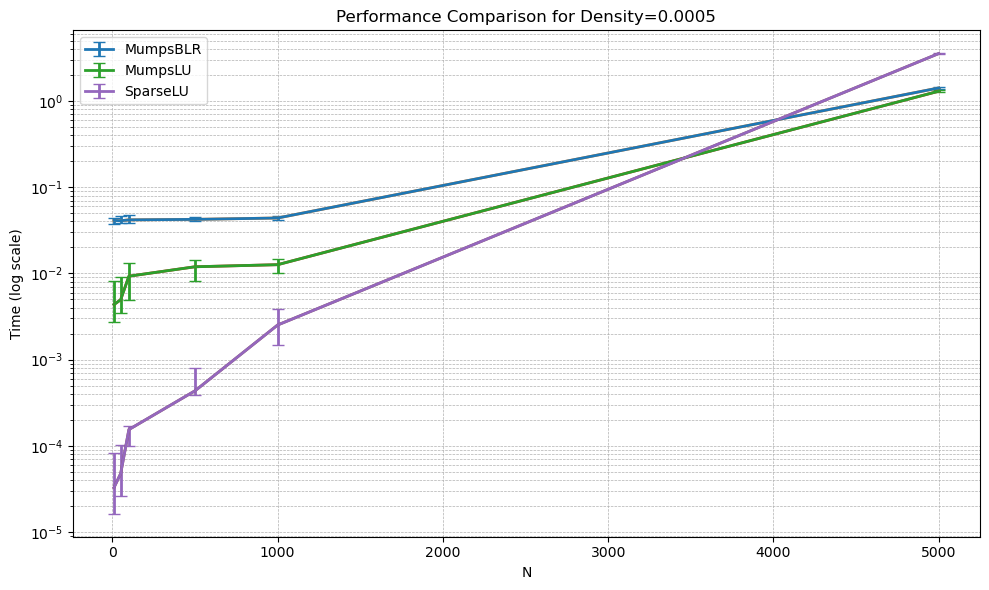

Saved plot for Density=0.001 at plots/rand/logy/logy_density_0.001.png


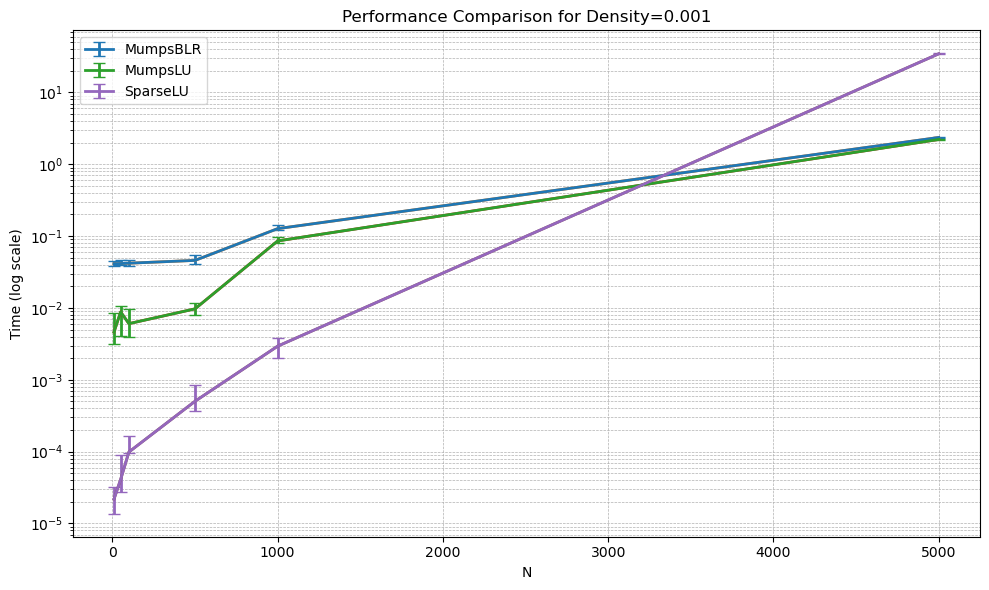

Saved plot for Density=0.005 at plots/rand/logy/logy_density_0.005.png


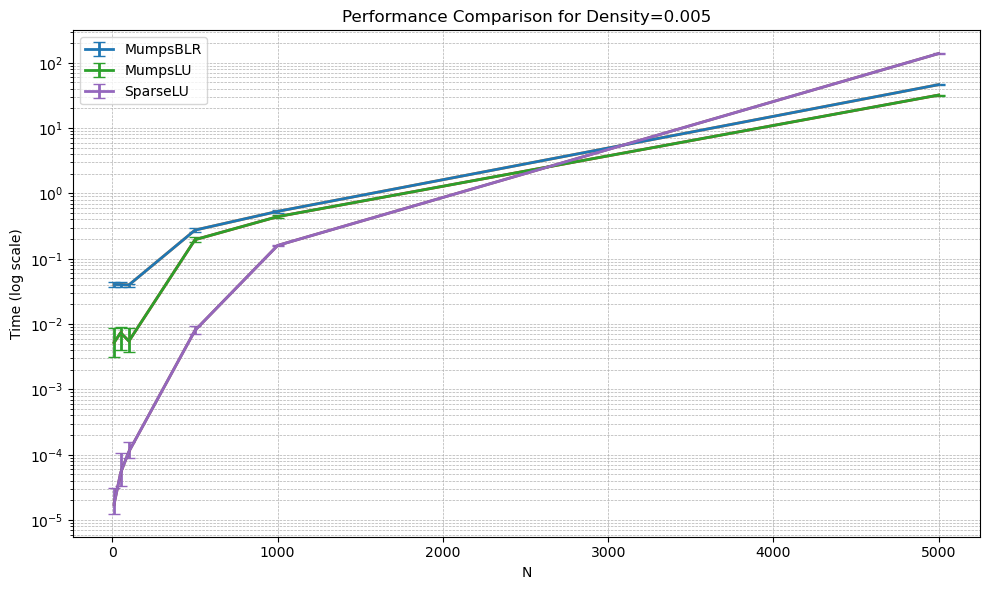

Saved plot for Density=0.01 at plots/rand/logy/logy_density_0.01.png


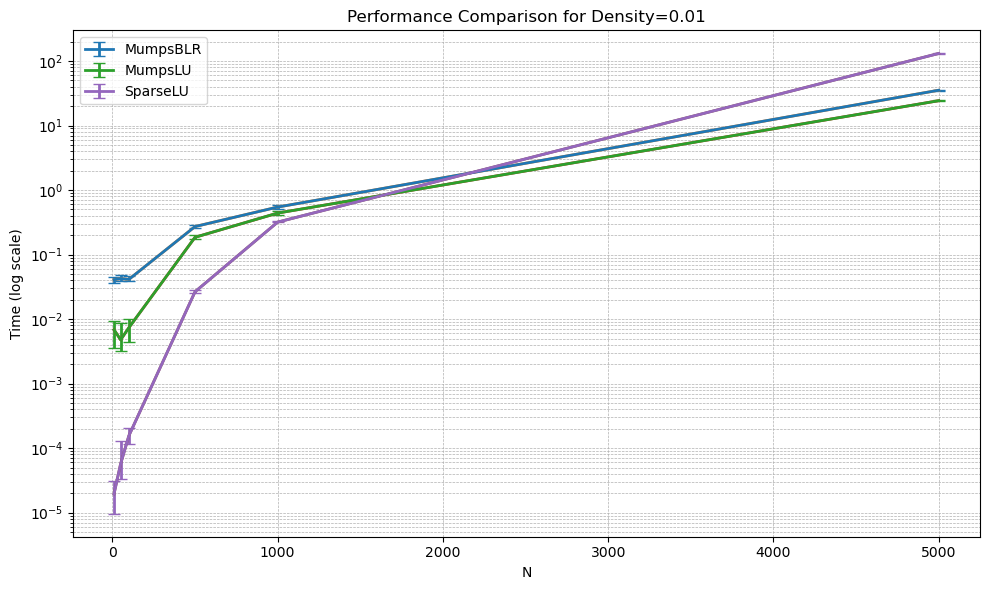

Saved plot for Density=0.05 at plots/rand/logy/logy_density_0.05.png


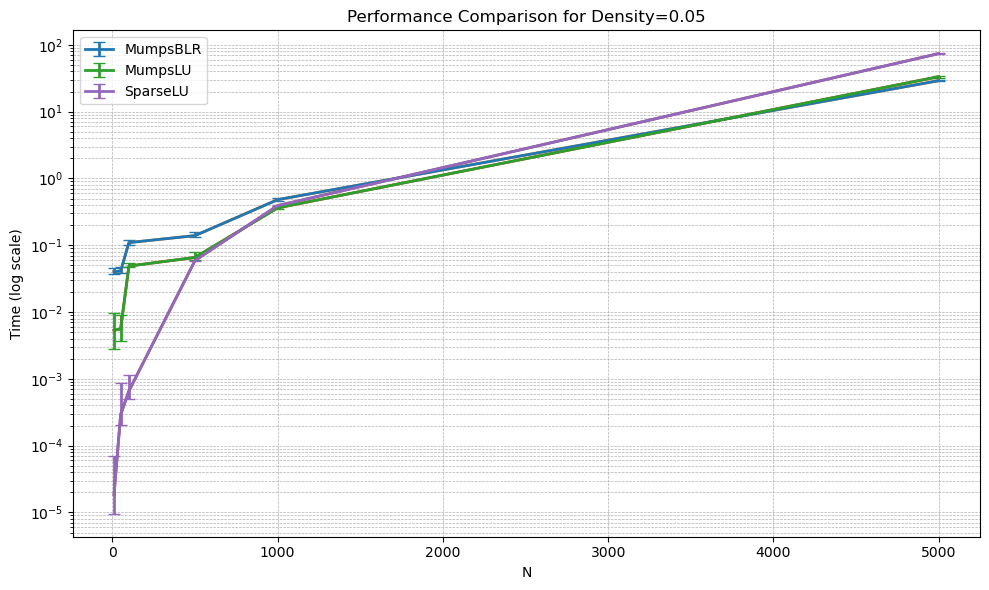

Saved plot for Density=0.1 at plots/rand/logy/logy_density_0.1.png


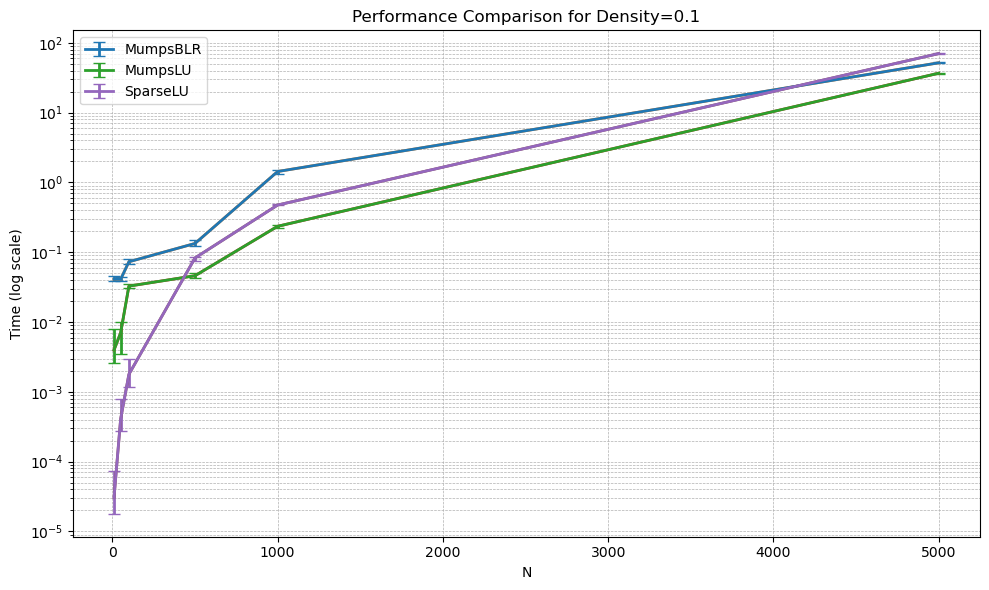

In [51]:
unique_density = stats['density'].unique()
for density in unique_density:
    subset = stats[stats['density'] == density]
    plt.figure(figsize=(10, 6))

    for solver in subset['Solver'].unique():
        solver_data = subset[subset['Solver'] == solver]
        plt.errorbar(
            solver_data['N'], solver_data['median'], 
            yerr=[solver_data['lower_error'], solver_data['upper_error']], 
            label=solver, linewidth=2, capsize=4
        )
        plt.plot(
            solver_data['N'], solver_data['median'], 
            label="_nolegend_", linewidth=2 
        )

    # plt.xscale('log')   
    plt.yscale('log')   
    plt.xlabel('N')
    plt.ylabel('Time (log scale)')
    plt.title(f'Performance Comparison for Density={density}')
    plt.legend()
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.tight_layout()

    filename = os.path.join(logy_dir, f"logy_density_{density}.png")
    plt.savefig(filename)
    print(f"Saved plot for Density={density} at {filename}")
    
    plt.show()

# Logx plots

In [52]:
logx_dir = os.path.join(save_dir, "logx")
os.makedirs(logx_dir, exist_ok=True)

Saved plot for N=10 at plots/rand/logx/logx_N_10.png


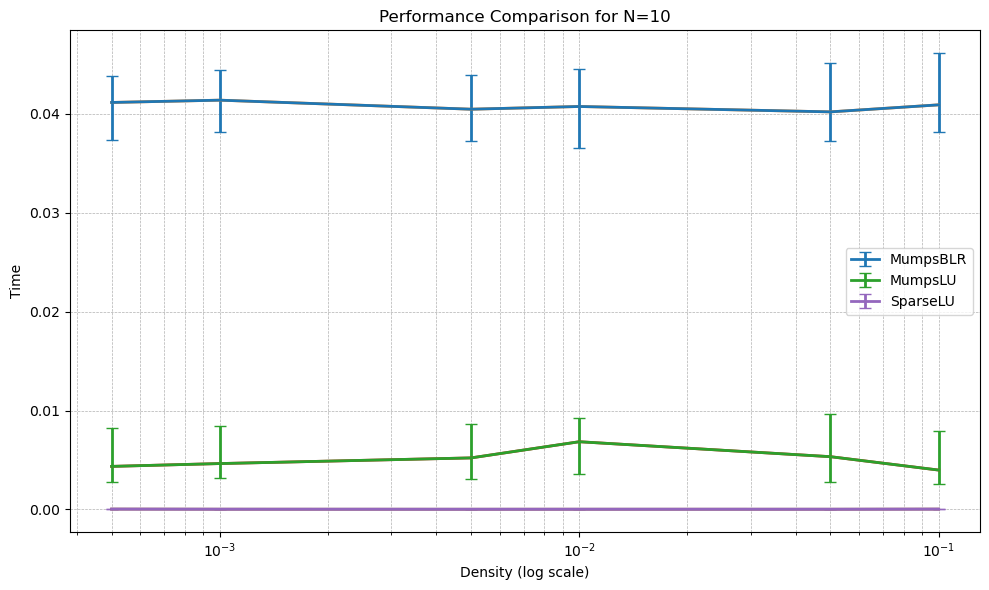

Saved plot for N=50 at plots/rand/logx/logx_N_50.png


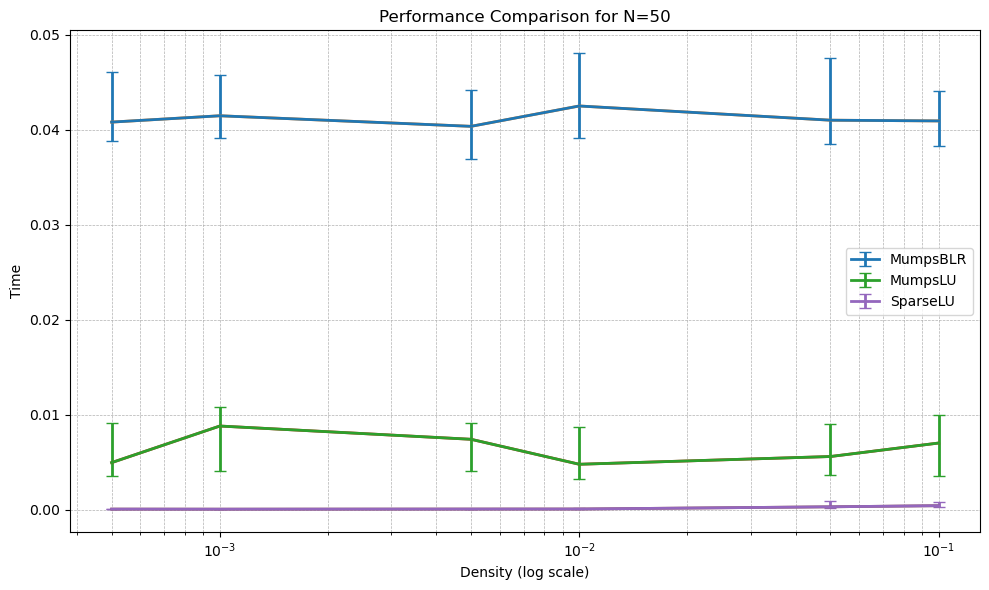

Saved plot for N=100 at plots/rand/logx/logx_N_100.png


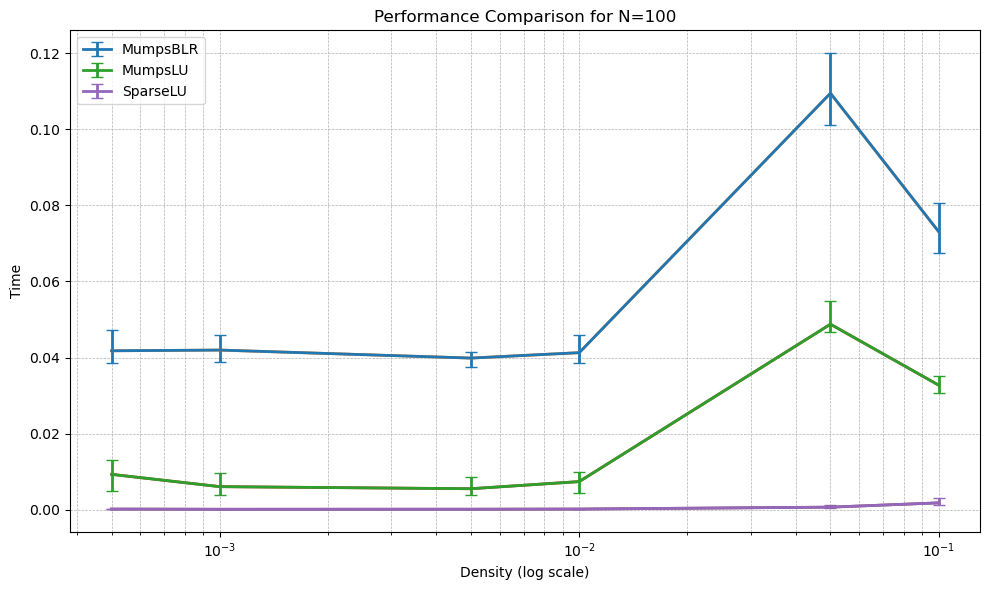

Saved plot for N=500 at plots/rand/logx/logx_N_500.png


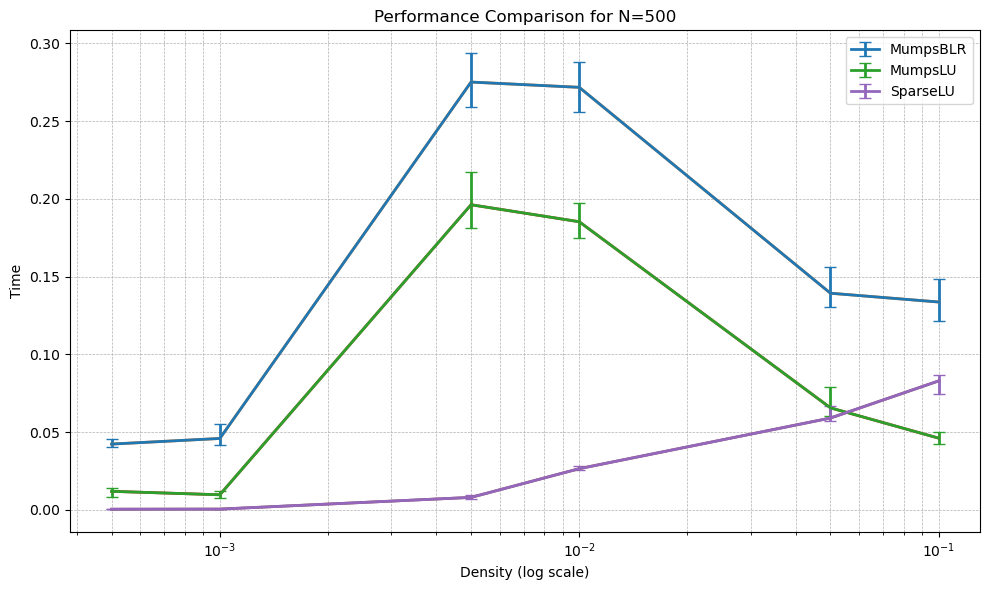

Saved plot for N=1000 at plots/rand/logx/logx_N_1000.png


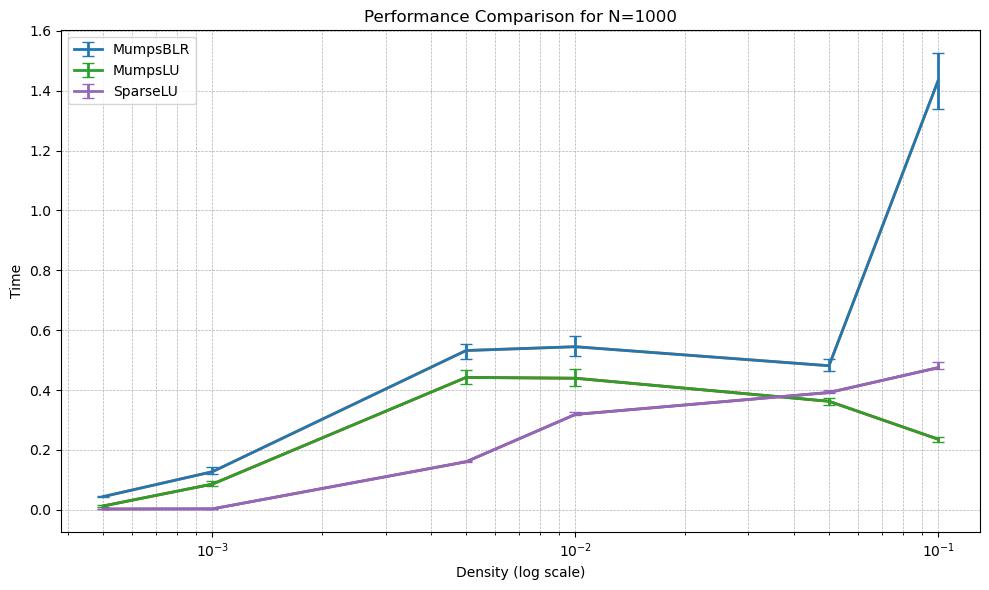

Saved plot for N=5000 at plots/rand/logx/logx_N_5000.png


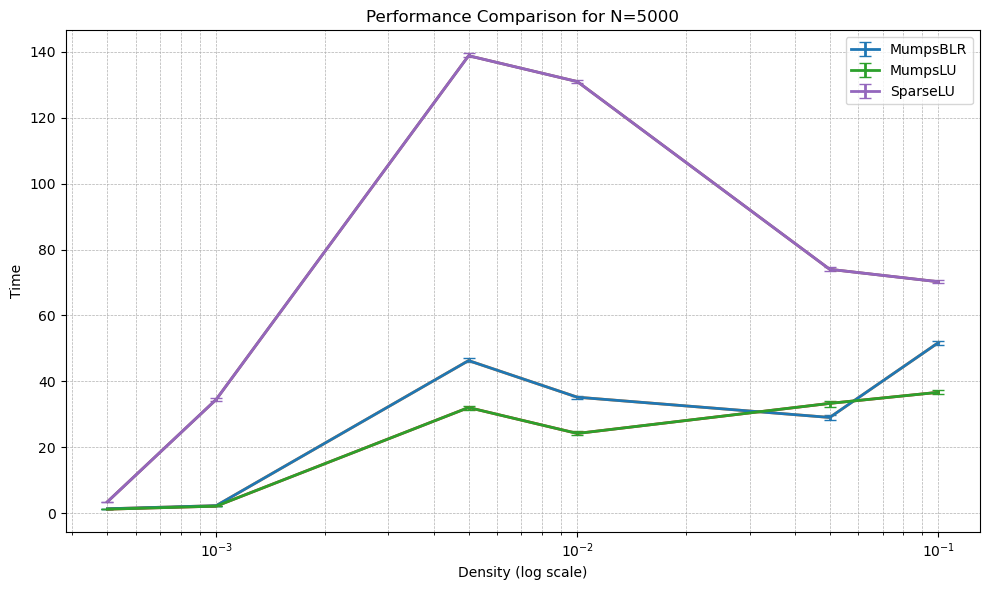

In [53]:
unique_N = stats['N'].unique()
for N in unique_N:
    subset = stats[stats['N'] == N]
    plt.figure(figsize=(10, 6))

    for solver in subset['Solver'].unique():
        solver_data = subset[subset['Solver'] == solver]
        plt.errorbar(
            solver_data['density'], solver_data['median'], 
            yerr=[solver_data['lower_error'], solver_data['upper_error']], 
            label=solver, linewidth=2, capsize=4
        )
        plt.plot(
            solver_data['density'], solver_data['median'], 
            label="_nolegend_", linewidth=2 
        )

    plt.xscale('log')   
    # plt.yscale('log')   
    plt.xlabel('Density (log scale)')
    plt.ylabel('Time')
    plt.title(f'Performance Comparison for N={N}')
    plt.legend()
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.tight_layout()

    filename = os.path.join(logx_dir, f"logx_N_{N}.png")
    plt.savefig(filename)
    print(f"Saved plot for N={N} at {filename}")
    
    plt.show()

Saved plot for Density=0.0005 at plots/rand/logx/logx_density_0.0005.png


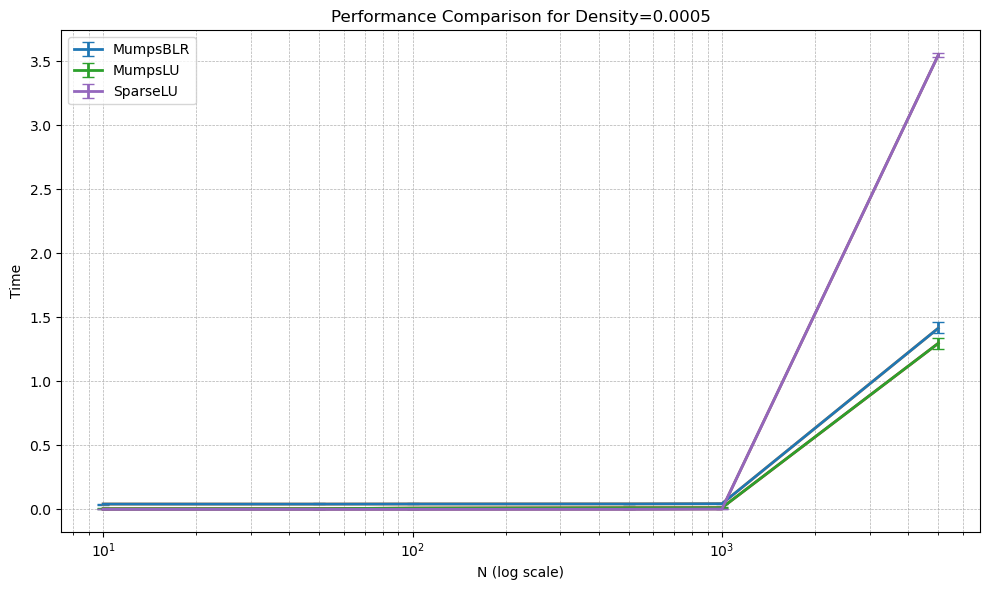

Saved plot for Density=0.001 at plots/rand/logx/logx_density_0.001.png


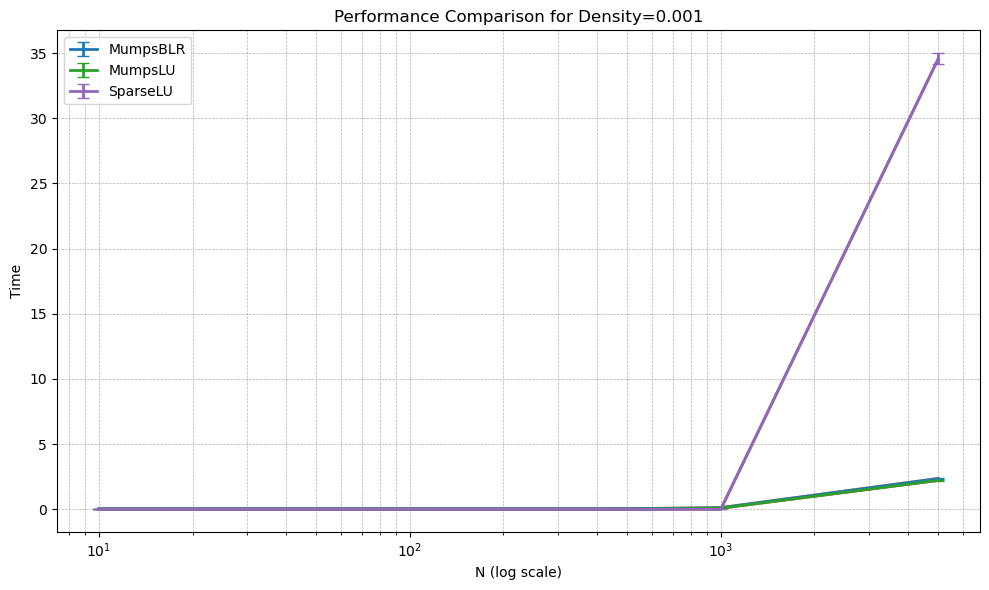

Saved plot for Density=0.005 at plots/rand/logx/logx_density_0.005.png


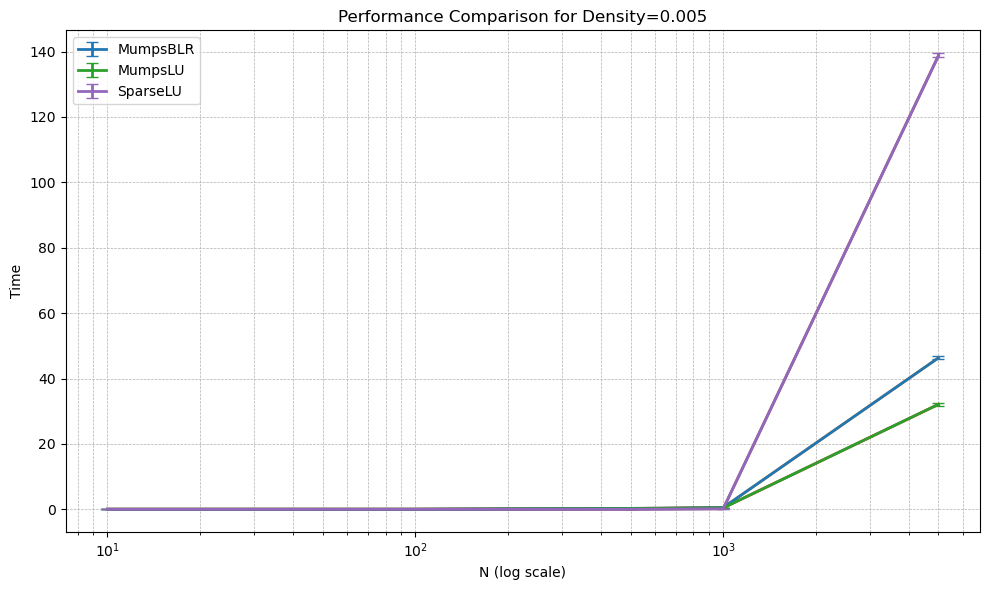

Saved plot for Density=0.01 at plots/rand/logx/logx_density_0.01.png


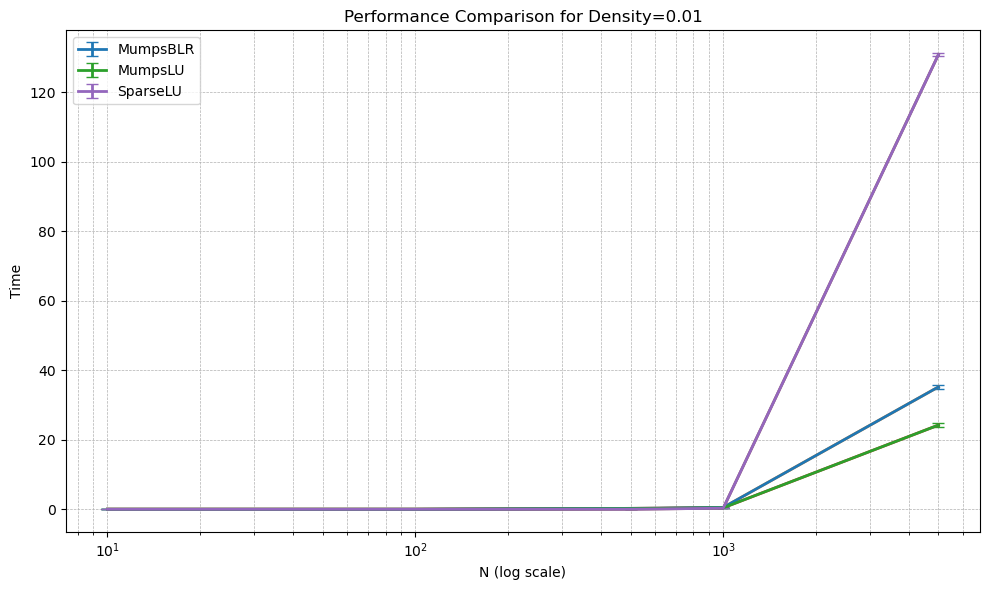

Saved plot for Density=0.05 at plots/rand/logx/logx_density_0.05.png


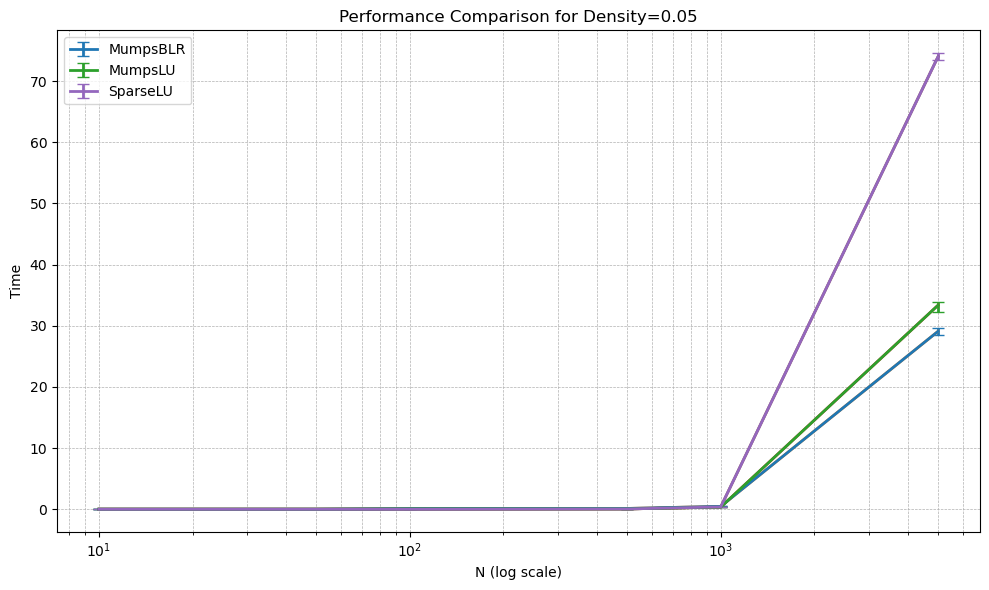

Saved plot for Density=0.1 at plots/rand/logx/logx_density_0.1.png


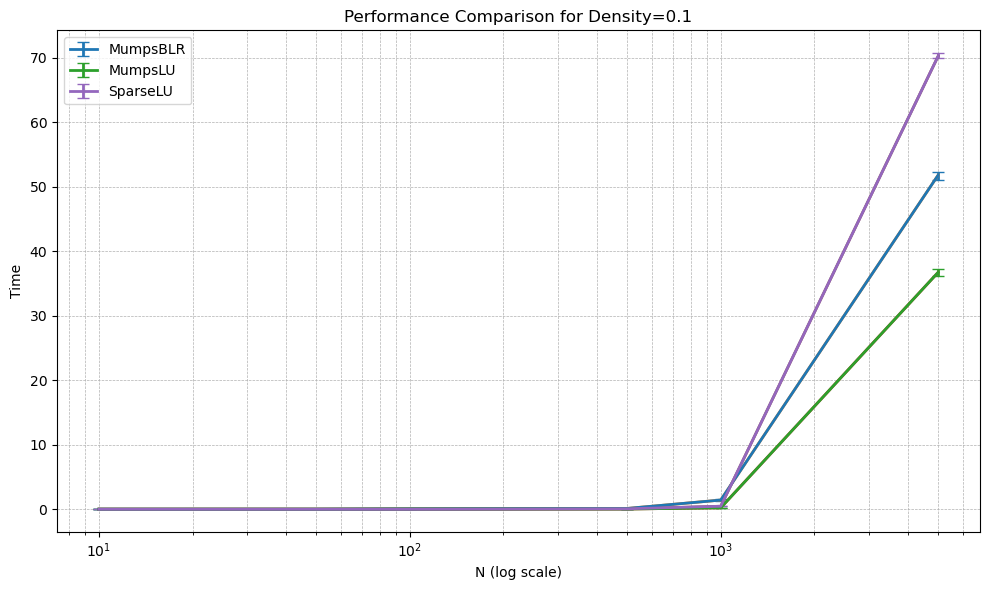

In [54]:
unique_density = stats['density'].unique()
for density in unique_density:
    subset = stats[stats['density'] == density]
    plt.figure(figsize=(10, 6))

    for solver in subset['Solver'].unique():
        solver_data = subset[subset['Solver'] == solver]
        plt.errorbar(
            solver_data['N'], solver_data['median'], 
            yerr=[solver_data['lower_error'], solver_data['upper_error']], 
            label=solver, linewidth=2, capsize=4
        )
        plt.plot(
            solver_data['N'], solver_data['median'], 
            label="_nolegend_", linewidth=2 
        )

    plt.xscale('log')   
    # plt.yscale('log')   
    plt.xlabel('N (log scale)')
    plt.ylabel('Time')
    plt.title(f'Performance Comparison for Density={density}')
    plt.legend()
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.tight_layout()

    filename = os.path.join(logx_dir, f"logx_density_{density}.png")
    plt.savefig(filename)
    print(f"Saved plot for Density={density} at {filename}")
    
    plt.show()